<img src="../../images/wt4.png" align="right" width="70"/>

  #     Notebook for early bearing fault detection for WT04



## Table of contents
1. Raw signal
2. Resampled signal
3. Filtered signal with optimal bandpass based on SK
4. Demodulasation using EEMD signals
5. Selecting IMF: Correlation coefficient
6. Envelope spectral analyis
7. Frequency study

In [1]:
%load_ext autoreload

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff, feature_extraction

## 1. Raw signal 

In [3]:
_, times, op_data_intervals, _ = load_raw_signals.load_raw('gearbox','wt04')

File exist


In [ ]:
envelope.plot_vib_consecutive(vib_signal)

In [ ]:
# One interval:
plt.plot(times[0][0:10000],vib_signal[0][0:10000])

In [71]:
# Reading filtered from disk
filtered_path = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/filtered/'

num_csvs = len([f for f in os.listdir(filtered_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_path, f)) and f[0]=='f'])

filtered_signals = []
filtered_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_path+'filtered_raw_6000_'+str(i)+'.csv')
    columns.append('filtered_' + str(i))
    filtered_signals.append(acc.values.T[0])
    filtered_freqs.append(acc.shape[0] / times[i][-1])
    print(f'Reading {i} / {num_csvs} files', end='\r')

In [82]:
np.asarray(filtered_signals).shape


(424, 262143)

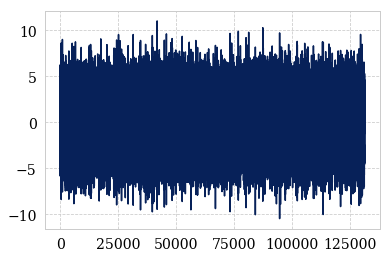

In [83]:
i = 0
plt.plot(filtered_signals[i][0:(len(filtered_signals[0])//2)])
use_signal = filtered_signals[i][0:(len(filtered_signals[0])//2)]

### Optimal bandwidth (filtered raw)

In [84]:
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_path = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv'
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = pd.read_csv(fc_and_bw_path)
fc_and_bw_data

File   Frequencies   Bandwidths
0      filtered_raw_6000_0.csv   9600.036621  6400.024414
1      filtered_raw_6000_1.csv   5975.022793    50.000191
2     filtered_raw_6000_10.csv   9600.036621  6400.024414
3    filtered_raw_6000_100.csv   9600.036621  6400.024414
4    filtered_raw_6000_101.csv   9600.036621  6400.024414
5    filtered_raw_6000_102.csv   8925.034046    50.000191
6    filtered_raw_6000_103.csv   8675.033093    50.000191
7    filtered_raw_6000_104.csv   5525.021076    50.000191
8    filtered_raw_6000_105.csv   9600.036621  6400.024414
9    filtered_raw_6000_106.csv   9600.036621  6400.024414
10   filtered_raw_6000_107.csv   9600.036621  6400.024414
11   filtered_raw_6000_108.csv   6075.023174    50.000191
12   filtered_raw_6000_109.csv   8775.033474    50.000191
13    filtered_raw_6000_11.csv   7875.030041    50.000191
14   filtered_raw_6000_110.csv   9600.036621  6400.024414
15   filtered_raw_6000_111.csv   9600.036621  6400.024414
16   filtered_raw_6000_112.csv   9600.036621  6400.024414
17   filtered_raw_6000_113.csv   5975.022793    50.000191
18   filtered_raw_6000_114.csv   9600.036621  6400.024414
19   filtered_raw_6000_115.csv   4275.016308    50.000191
20   filtered_raw_6000_116.csv   6225.023747    50.000191
21   filtered_raw_6000_117.csv   6075.023174    50.000191
22   filtered_raw_6000_118.csv   8775.033474    50.000191
23   filtered_raw_6000_119.csv   5925.022602    50.000191
24    filtered_raw_6000_12.csv   6100.023270    66.666921
25   filtered_raw_6000_120.csv   8925.034046    50.000191
26   filtered_raw_6000_121.csv   9600.036621  6400.024414
27   filtered_raw_6000_122.csv   9600.036621  6400.024414
28   filtered_raw_6000_123.csv   8775.033474    50.000191
29   filtered_raw_6000_124.csv   9175.035000    50.000191
..                         ...           ...          ...
394   filtered_raw_6000_72.csv   9025.034428    50.000191
395   filtered_raw_6000_73.csv   9600.036621  6400.024414
396   filtered_raw_6000_74.csv   8775.033474    50.000191
397   filtered_raw_6000_75.csv   9375.035763    50.000191
398   filtered_raw_6000_76.csv   8775.033474    50.000191
399   filtered_raw_6000_77.csv   9425.035954    50.000191
400   filtered_raw_6000_78.csv   9475.036144    50.000191
401   filtered_raw_6000_79.csv   5625.021458    50.000191
402    filtered_raw_6000_8.csv   4775.018215    50.000191
403   filtered_raw_6000_80.csv   6075.023174    50.000191
404   filtered_raw_6000_81.csv   9600.036621  6400.024414
405   filtered_raw_6000_82.csv   5525.021076    50.000191
406   filtered_raw_6000_83.csv   4775.018215    50.000191
407   filtered_raw_6000_84.csv   8975.034237    50.000191
408   filtered_raw_6000_85.csv   9275.035381    50.000191
409   filtered_raw_6000_86.csv   9600.036621  6400.024414
410   filtered_raw_6000_87.csv   9600.036621  6400.024414
411   filtered_raw_6000_88.csv   8775.033474    50.000191
412   filtered_raw_6000_89.csv  12175.046444    50.000191
413    filtered_raw_6000_9.csv   9600.036621  6400.024414
414   filtered_raw_6000_90.csv   8775.033474    50.000191
415   filtered_raw_6000_91.csv   5500.020981    66.666921
416   filtered_raw_6000_92.csv   9375.035763    50.000191
417   filtered_raw_6000_93.csv   8925.034046    50.000191
418   filtered_raw_6000_94.csv   9600.036621  6400.024414
419   filtered_raw_6000_95.csv  12100.046158    66.666921
420   filtered_raw_6000_96.csv   9600.036621  6400.024414
421   filtered_raw_6000_97.csv   9600.036621  6400.024414
422   filtered_raw_6000_98.csv   9125.034809    50.000191
423   filtered_raw_6000_99.csv   9600.036621  6400.024414

[424 rows x 3 columns]

Before filter shape: (424, 9)
After filtering: (322, 9)


Unnamed: 0     AvgPower     ActPower  WindSpeed  NacelleDirection  \
1             1  2697.461426  2332.100098   9.100000        256.100006   
2             2  2606.151855  2843.500000  10.000000        240.199997   
3             3  2541.849854  2694.100098  10.500000         71.099998   
4             4  2853.304199  3293.399902  12.700000        269.399994   
6             6  2752.077881  3040.300049   9.700000        143.899994   
7             7   558.968140 -1000.000000 -10.000000       -500.000000   
8             8  3301.744629  3325.800049  14.700000        264.899994   
9             9  3034.307373  2961.899902  10.500000        301.600006   
10           10  2509.034180  2320.300049   9.400000        137.000000   
12           12  3224.229492  3260.399902  13.500000        249.500000   
13           13  2535.946045  2243.300049   9.000000        124.500000   
14           14  2993.638428  3313.600098  10.800000        272.600006   
16           16  2523.422119  2458.800049  10.000000        163.300003   
18           18  2549.238037  2449.399902   8.700000        120.800003   
19           19  2664.726074  2365.899902   8.800000        157.500000   
20           20  3283.781738  3306.000000  13.500000        232.500000   
24           24  2731.625488  2429.399902   9.200000        142.600006   
25           25  3230.940918  2667.000000  11.200000        133.300003   
26           26  3078.562988  2568.100098  10.900000        128.199997   
27           27  2142.530518  2092.300049  11.400000        170.800003   
28           28  2980.547852  3337.300049  12.000000        160.100006   
29           29  2647.207520  2014.699951   8.900000        170.000000   
30           30  2509.422119  2531.699951  10.800000        233.500000   
31           31  2255.269043  3307.399902  12.300000        270.000000   
32           32  2527.933105  1639.000000   8.300000        261.700012   
33           33  2597.351807  2940.800049  10.300000        218.600006   
34           34  3272.999756  3079.600098  10.800000        258.799988   
35           35  2428.364990  2884.500000  11.700000        253.199997   
36           36  2516.569092  2538.300049   8.700000        267.000000   
37           37  2662.085693  1635.000000   9.200000        160.399994   
..          ...          ...          ...        ...               ...   
383         383  3289.540527  3330.199951  13.500000        274.200012   
385         385  2520.658936  2603.699951   9.700000        117.099998   
386         386  2558.244141  1764.099976   9.100000        118.900002   
388         388  2522.981445  2376.500000   9.300000        128.500000   
389         389  2655.359131  2437.600098  10.000000        120.800003   
390         390   760.454468 -1000.000000 -10.000000       -500.000000   
391         391  3308.155029  3308.199951  16.100000        146.100006   
392         392  3296.247803  3272.600098  11.300000         21.600000   
395         395  2563.926514  2790.600098  10.000000        120.300003   
396         396  2603.451904  2156.800049   8.100000        118.699997   
398         398  2516.946289  2352.399902   9.900000        122.699997   
399         399  2769.840576  2620.600098  10.000000        129.300003   
400         400  2050.503662  2410.800049   7.900000        136.500000   
401         401  2645.888428  2136.100098   7.400000        124.500000   
404         404  2598.025879  2781.000000   9.900000        122.400002   
405         405  3303.059570  3307.800049  14.000000        120.500000   
406         406  3297.176758  3317.399902  12.000000        153.199997   
408         408  3004.703613  3303.800049  11.600000         42.900002   
409         409  2548.551758  2245.500000   9.100000         31.700001   
410         410  3294.881592  3340.199951  16.200001        121.900002   
412         412  2759.059570  2591.399902   9.500000        215.199997   
413         413  3140.048096    23.700001  14.700000        247.100006   
414      

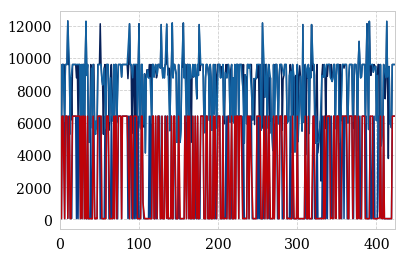

In [85]:
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[2].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)

# How the frequencies and bandwidths vary across the intervals for wt4:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()

op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)

print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
filter_concated

In [86]:
# Doing some filtering
# Removing outliers:
print(f'Shape before filtering {filter_concated.shape}')
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] < 10000)]
print(f'Shape after filtering {filter_concated.shape}')

# Filtering away the ones below 6000Hz
print(f'Shape before filtering {filter_concated.shape}')
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] > 7000 )]
print(f'Shape after filtering {filter_concated.shape}')

filter_concated

Shape before filtering (322, 9)
Shape after filtering (306, 9)
Shape before filtering (306, 9)
Shape after filtering (222, 9)


Unnamed: 0     AvgPower     ActPower  WindSpeed  NacelleDirection  \
1             1  2697.461426  2332.100098   9.100000        256.100006   
3             3  2541.849854  2694.100098  10.500000         71.099998   
4             4  2853.304199  3293.399902  12.700000        269.399994   
7             7   558.968140 -1000.000000 -10.000000       -500.000000   
8             8  3301.744629  3325.800049  14.700000        264.899994   
9             9  3034.307373  2961.899902  10.500000        301.600006   
12           12  3224.229492  3260.399902  13.500000        249.500000   
14           14  2993.638428  3313.600098  10.800000        272.600006   
16           16  2523.422119  2458.800049  10.000000        163.300003   
18           18  2549.238037  2449.399902   8.700000        120.800003   
19           19  2664.726074  2365.899902   8.800000        157.500000   
20           20  3283.781738  3306.000000  13.500000        232.500000   
24           24  2731.625488  2429.399902   9.200000        142.600006   
25           25  3230.940918  2667.000000  11.200000        133.300003   
27           27  2142.530518  2092.300049  11.400000        170.800003   
29           29  2647.207520  2014.699951   8.900000        170.000000   
30           30  2509.422119  2531.699951  10.800000        233.500000   
32           32  2527.933105  1639.000000   8.300000        261.700012   
34           34  3272.999756  3079.600098  10.800000        258.799988   
35           35  2428.364990  2884.500000  11.700000        253.199997   
40           40  3304.381592  3295.399902  12.600000        150.000000   
42           42  2832.792480  3208.600098  10.700000        219.699997   
48           48  3301.615479  3299.500000  20.799999        269.700012   
49           49  2850.659180  1917.900024   9.300000        218.899994   
50           50  3014.533203  3321.399902   9.800000        297.600006   
52           52  2739.311768  3296.100098  11.700000        309.000000   
53           53  2730.026123  2751.699951   9.100000        216.000000   
54           54  3084.633057  3165.899902  13.000000        267.600006   
56           56  2542.777832  2280.600098   9.700000        302.100006   
59           59  2702.426514  2427.699951   9.500000        141.500000   
..          ...          ...          ...        ...               ...   
366         366  2470.777832  2571.699951  10.300000        305.600006   
367         367  2725.966553  3300.000000  12.200000        283.000000   
368         368  2793.169922  2219.000000   8.900000        150.300003   
369         369  2514.733643  2113.500000   9.100000        155.100006   
372         372  2804.947998  2526.300049  11.500000        251.600006   
373         373  3251.756104  3254.500000  13.600000        270.500000   
374         374  3086.951904  3308.399902  16.100000        291.500000   
375         375  2206.341064  1920.300049   9.300000        201.600006   
377         377  3296.977051  3304.600098  11.500000        310.899994   
380         380  2672.825928  2362.399902  11.000000        329.200012   
381         381  2590.307617  2334.699951   8.500000        164.899994   
382         382  2577.529541  2207.500000   9.300000        176.899994   
383         383  3289.540527  3330.199951  13.500000        274.200012   
385         385  2520.658936  2603.699951   9.700000        117.099998   
389         389  2655.359131  2437.600098  10.000000        120.800003   
392         392  3296.247803  3272.600098  11.300000         21.600000   
395         395  2563.926514  2790.600098  10.000000        120.300003   
396         396  2603.451904  2156.800049   8.100000        118.699997   
398         398  2516.946289  2352.399902   9.900000        122.699997   
399         399  2769.840576  2620.600098  10.000000        129.300003   
401         401  2645.888428  2136.100098   7.400000        124.500000   
405         405  3303.059570  3307.800049  14.000000        120.500000   
409      

Before filter shape: (424, 9)
After filtering: (222, 9)


222

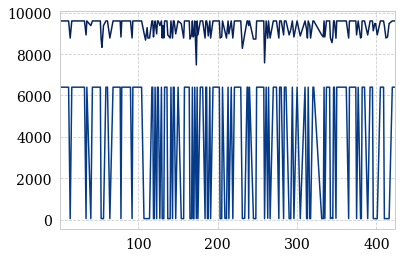

In [87]:
# Finding the average optimal now.
op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)
print(f"Before filter shape: {concated.shape}")
filter_concated = filter_concated.loc[(filter_concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
len(filter_concated)


In [88]:
print(int(round(mean_freq)))
print(int(round(mean_bw))) # set this to 500?

9338
4055


In [90]:
np.asarray(filter_concated).shape

(222, 9)

## 2. Resampled signal

### Reading from file

In [ ]:
# The resampled signal is filtered (Lowcut at 200 Hz (highpass))
filtered_resampled_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/filtered_resampled/'

num_csvs = len([f for f in os.listdir(filtered_resampled_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_resampled_path, f)) and f[0]=='f'])

filtered_resampled_signals = []
resample_freqs = []
columns = []
for i in range(num_csvs):
    acc=pd.read_csv(filtered_resampled_path+'filtered_resampled_'+str(i)+'.csv')
    columns.append('filtered_resampled_' + str(i))
    filtered_resampled_signals.append(acc.values)
    resample_freqs.append(acc.shape[0] / times[i][-1])

In [ ]:
resample_freqs
resample_freqs = pd.DataFrame(resample_freqs,columns)

## 3. Filtered, resampled signal with optimal bandpass based on SK

# Read kurtogram data

In [ ]:
'''
fc_and_bw_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv';
frequencies_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/frequencies.csv';
file_names_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/file_name.txt';

fc_and_bw = pd.read_csv(fc_and_bw_path)
frequencies = pd.read_csv(frequencies_path)
file_names = pd.read_csv(file_names_path, header=None)

frequencies_numpy = np.asarray(frequencies).T
frequencies = pd.DataFrame(frequencies_numpy, columns= frequencies_numpy[0])
frequencies = frequencies.drop(frequencies.index[0]).reset_index(drop=True)
'''

In [ ]:
'''
kurt_path = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/kurtograms/';
kurt_file = f'{kurt_path}kgram_filtered_resampled_1.csv'
kurtogram = pd.read_csv(kurt_file, header=None)
plotting_methods.plot_kurtogram(kurtogram, frequencies['filtered_resampled_1.csv'])
'''

In [ ]:
'''
# Finding the optimal bandwidth by taking the mean from the SK
fc_and_bw_data = '/Volumes/OsvikExtra/signal_data/resampled_filtered_2000Hz/gearbox/wt04/center_frequencies_&_bandwidth/fc_and_bw_data.csv'
fc_and_bw_data = pd.read_csv(fc_and_bw_data)
# Make the file column to an int
fc_and_bw_data['File']=fc_and_bw_data['File'].apply(lambda x: int((str(x).split('_'))[2].split('.csv')[0]))
# Sort the df based on this
fc_and_bw_data=fc_and_bw_data.sort_values('File',ascending=True)
fc_and_bw_data = fc_and_bw_data.reset_index(drop=True)
'''

In [ ]:
'''
# How the frequencies and bandwidths vary across the intervals for wt4:
fc_and_bw_data['Frequencies'].plot()
fc_and_bw_data['Bandwidths'].plot()
'''

In [ ]:
'''
op_data_intervals
concated = pd.concat([op_data_intervals, fc_and_bw_data],axis=1)
print(f"Before filter shape: {concated.shape}")
filter_concated = concated.loc[(concated['AvgSpeed'] >= 1400)]
print(f"After filtering: {filter_concated.shape}")
mean_freq = filter_concated['Frequencies'].mean()
mean_bw = filter_concated['Bandwidths'].mean()
filter_concated['Frequencies'].plot()
filter_concated['Bandwidths'].plot()
filter_concated
'''

In [ ]:
'''
filter_concated = concated.loc[(concated['Frequencies'] > 18000)]
filter_concated
'''

In [ ]:
'''
# Remove higher peaks than 15000 Hz.
filter_concated = filter_concated.loc[(filter_concated['Frequencies'] <= 15000)]
'''

In [ ]:
'''
print(mean_freq)
print(mean_bw)
optimal_bandpass = {'highcut':mean_freq-mean_bw/2,'lowcut':mean_freq+mean_bw/2}
'''

In [ ]:
'''print(f'Low: {round(int(optimal_bandpass["highcut"]))}, High: {int(round(optimal_bandpass["lowcut"]))}')'''


In [ ]:
#resample_freqs=resample_freqs.rename(columns={0:'ResampleFreq'})

In [21]:
signal = filtered_resampled_csvs[1]
signal = filtered_resampled_csvs[1]
plt.plot(signal)
signal = np.array(signal)
signal.shape

NameError: name 'filtered_resampled_csvs' is not defined

In [ ]:
'''
# Perform bandpass filtering

optimal_bandpass_signals = []
i=1

low = round(int(optimal_bandpass["highcut"]))
high = round(int(optimal_bandpass["lowcut"]))
fs_resample = resample_freqs['ResampleFreq'].iloc[i]
signal = filtered_resampled_csvs[i]
y = filters.butter_bandpass_filter(signal,low,high,fs_resample)
optimal_bandpass.append(y)

plt.plot(signal)
plt.margins(0)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()
plt.title('Resampled signal with highpass filtering')
plt.plot(y)
plt.xlabel("Samples")
plt.margins(0)
plt.ylabel("Amplitude")
plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
'''

## Bandpass on raw signal with results from the spectral kurtosis

In [73]:
np.asarray(filtered_signals).shape

(424, 262143)

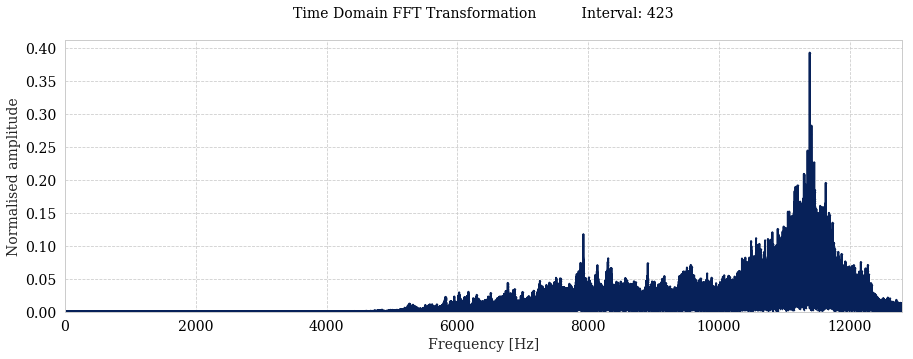

[array([-4.57777821e+00,  6.23560111e+00, -5.30728750e+00, ...,
         7.92317555e-01, -6.30238488e-01,  3.89325714e-04]),
 array([ 1.20317167e+00,  4.57116881e-01,  1.50268513e+00, ...,
        -1.19551097e+01,  1.33247075e+01, -6.10191483e-03]),
 array([ 1.46732061e+01, -7.92884955e+00, -8.37618139e+00, ...,
        -1.72580956e+01,  1.61627542e+01, -7.48026389e-03]),
 array([-1.22136100e+01,  1.56610476e+01, -1.47352757e+01, ...,
        -1.15417916e+01,  7.32931561e+00, -1.01113354e-02]),
 array([-2.94830183e-01, -1.18924156e+00,  2.29666473e+00, ...,
        -2.38299895e+01,  1.88837006e+01,  1.72635663e-02]),
 array([-1.1433978 ,  1.60664482, -0.97497593, ..., -1.03694865,
         0.78045079, -0.00399829]),
 array([  2.07418672,   4.36904712, -12.4083302 , ..., -10.42331396,
          8.57480328,   0.02501039]),
 array([-1.78219538e+01,  1.95001607e+01, -1.12606882e+01, ...,
        -2.05453939e+01,  1.77692957e+01,  8.99854007e-03]),
 array([-3.12370452e+00,  1.09336187e+01, 

In [74]:
plotting_methods.plot_fft(times[i], filtered_signals[i], interval_num=i)
filtered_signals

In [92]:
# Perform bandpass filtering on the raw signal!
def filter_based_on_optimal_bw(low,high,sig,time,plot=False):
    use_signal = sig
    signal = use_signal
    fs, _, _, _ =  envelope.get_sampling_freq(signal, time)

    #### Hardcoding the filters
    y = filters.butter_bandpass_filter(signal,low,high,fs)
    if plot:
        plt.plot(signal)
        plt.margins(0)
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.show()
        plt.title('Resampled signal with highpass filtering')
        plt.plot(y)
        plt.xlabel("Samples")
        plt.margins(0)
        plt.ylabel("Amplitude")
        plt.title(f'Interval {i} from WT04 filtered with average optimal bandpass from SK \n Component: Gearbox')
    return y

# Just loop through
optimal_bandpass_signals = []
signal_size = len(filtered_signals)
for i in range(len(filtered_signals)):
    use_signal = filtered_signals[i][0:(len(filtered_signals[i])//2)]
    time = times[i][0:(len(filtered_signals[i])//2)]
    low = mean_freq - mean_bw/2
    high = mean_freq + mean_bw/2
    y = filter_based_on_optimal_bw(low,high,use_signal, time)
    optimal_bandpass_signals.append(y)
    #plotting_methods.plot_fft(time, use_signal, interval_num=i)
    print(f'Filtering {i} / {signal_size} signals', end='\r')
#del filtered_signals

In [97]:
%autoreload
plotting_methods

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


<module 'plotting_methods' from '/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src/hybrid_analysis_process_functions/plotting_methods.py'>

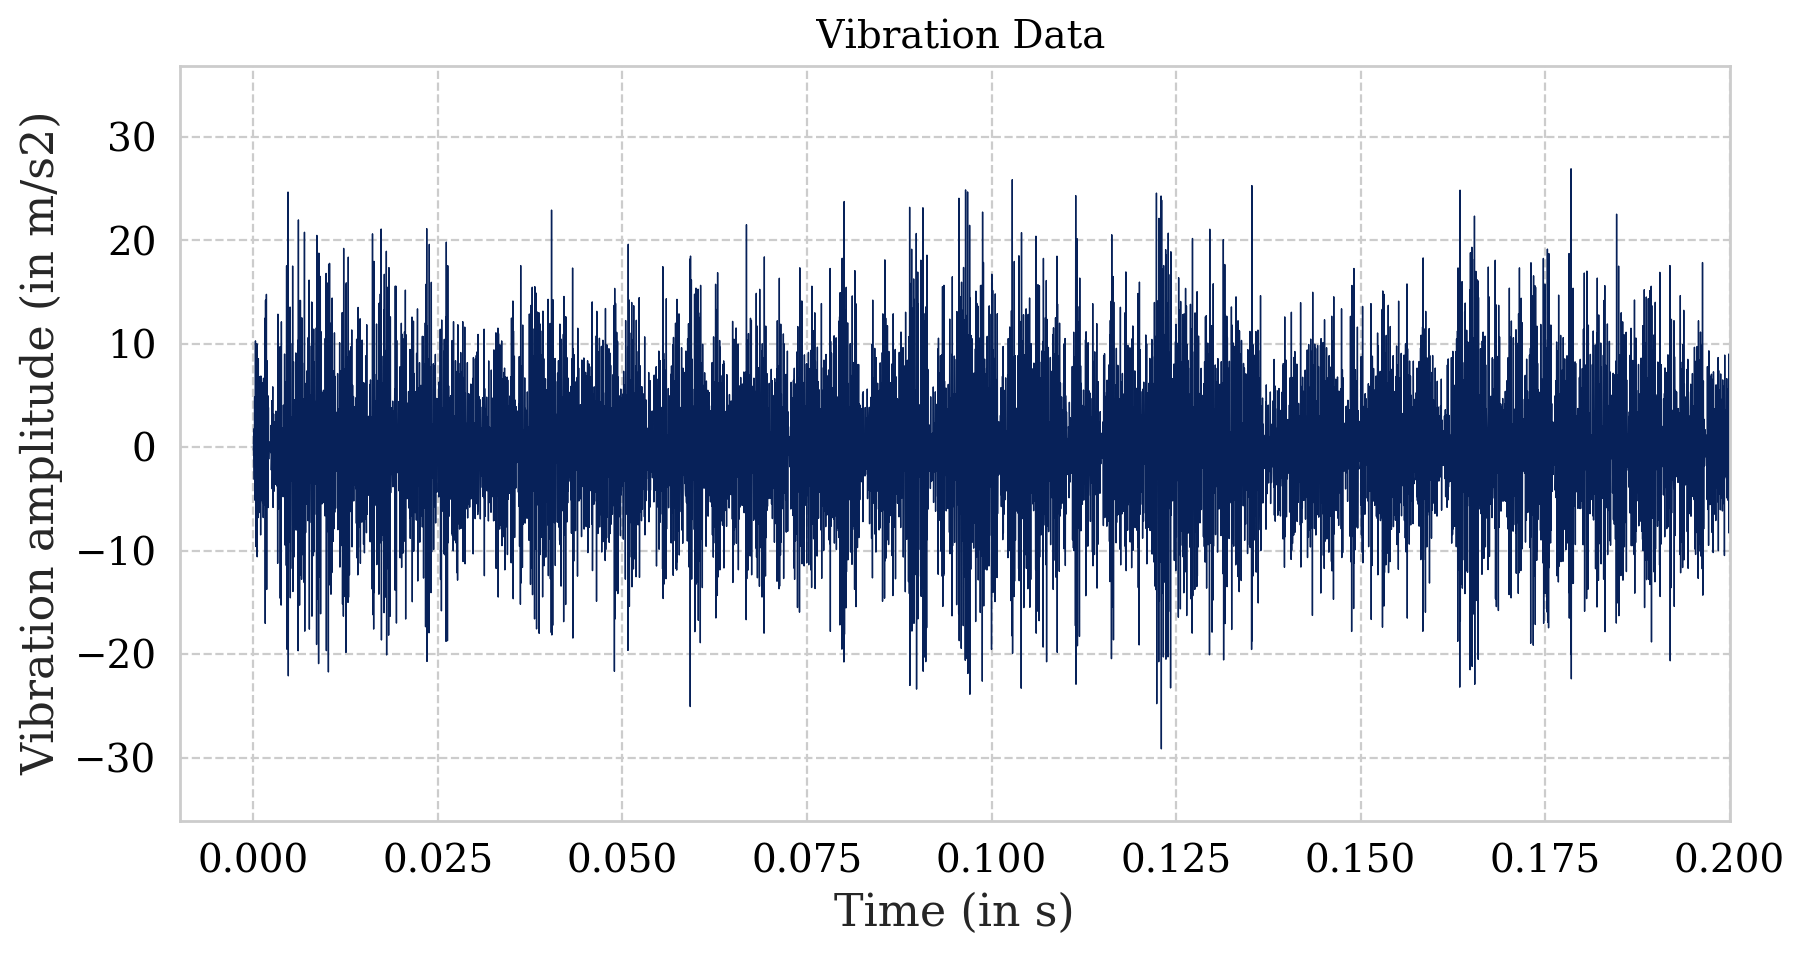

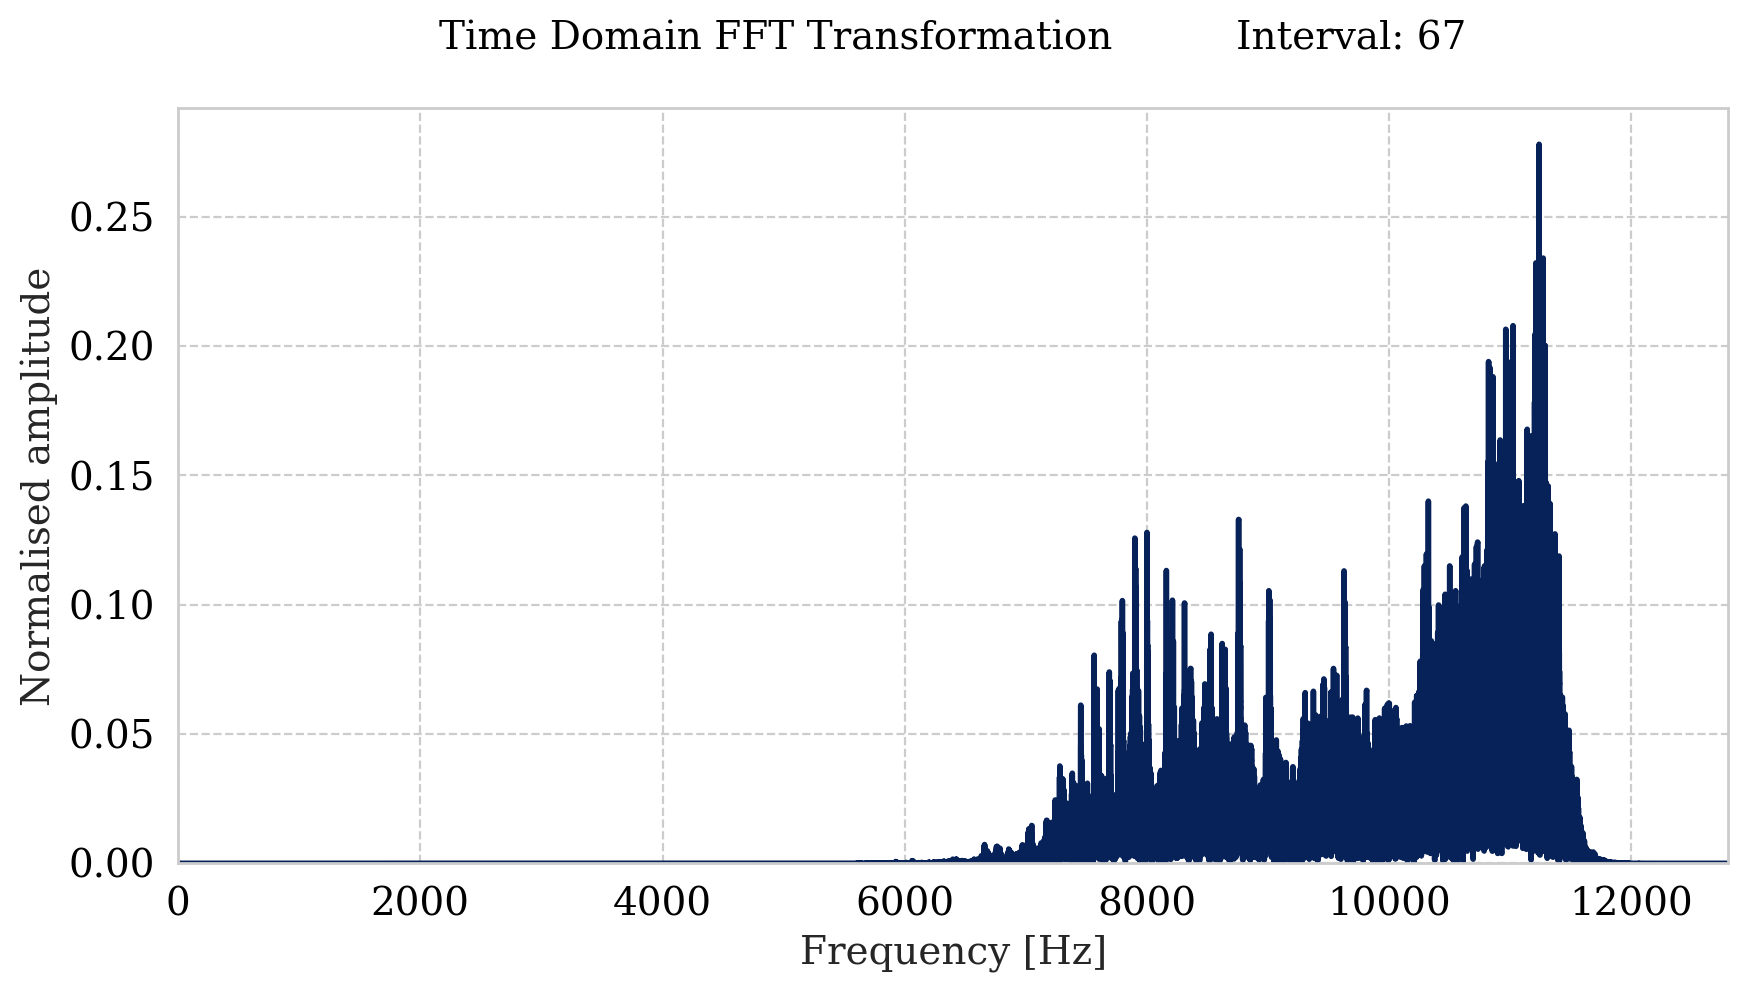

In [152]:
i = 67
plotting_methods.plot_signal(times[i][0:(len(filtered_signals[i])//2)], optimal_bandpass_signals[i], x_min=-0.01, x_max=0.2, name='')
plotting_methods.plot_fft(times[i][0:(len(filtered_signals[i])//2)], optimal_bandpass_signals[i], interval_num=i)

## 4. Demodulasation using EEMD signals

In [94]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

In [ ]:
j = 0 # The index in the optimal bandpass array. Which interval is this actually?

#all_eIMFS = []
array_size = len(optimal_bandpass_signals)

for j in range(len(optimal_bandpass_signals)):
    print(f'EEMD of {j+1} / {array_size} signals', end='\r')
    
    signal = (optimal_bandpass_signals[j]).reshape((len((optimal_bandpass_signals[j])), ))[0:20000]
    eIMFs=envelope_emd.eemd('WT04',j,'gearbox',signal,times[j][0:20000],False)
    eIMFs = np.asarray(eIMFs)
    local_path = f"../../../../../../signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/interval_number_{j}.csv"
    external_path = f"/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/interval_number_{j}.csv"
    np.savetxt(local_path, eIMFs, delimiter=",")
    #all_eIMFS.append(eIMFs)

print(f'Completed EEMD of {j+1} / {array_size} signals', end='\r')

## 5. Selecting IMF: Correlation coefficient

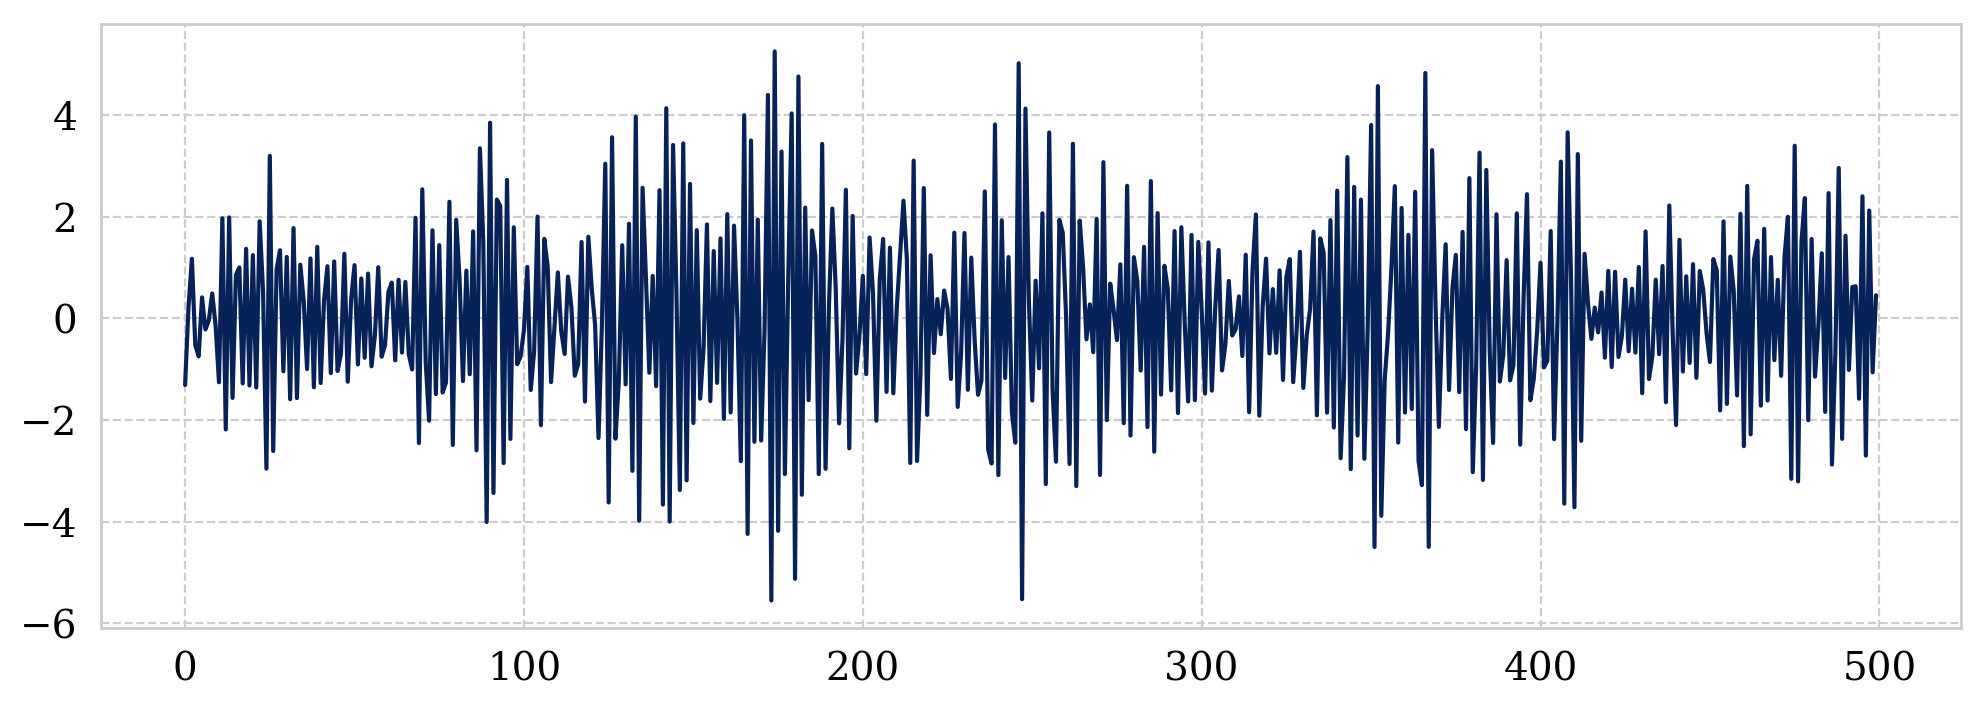

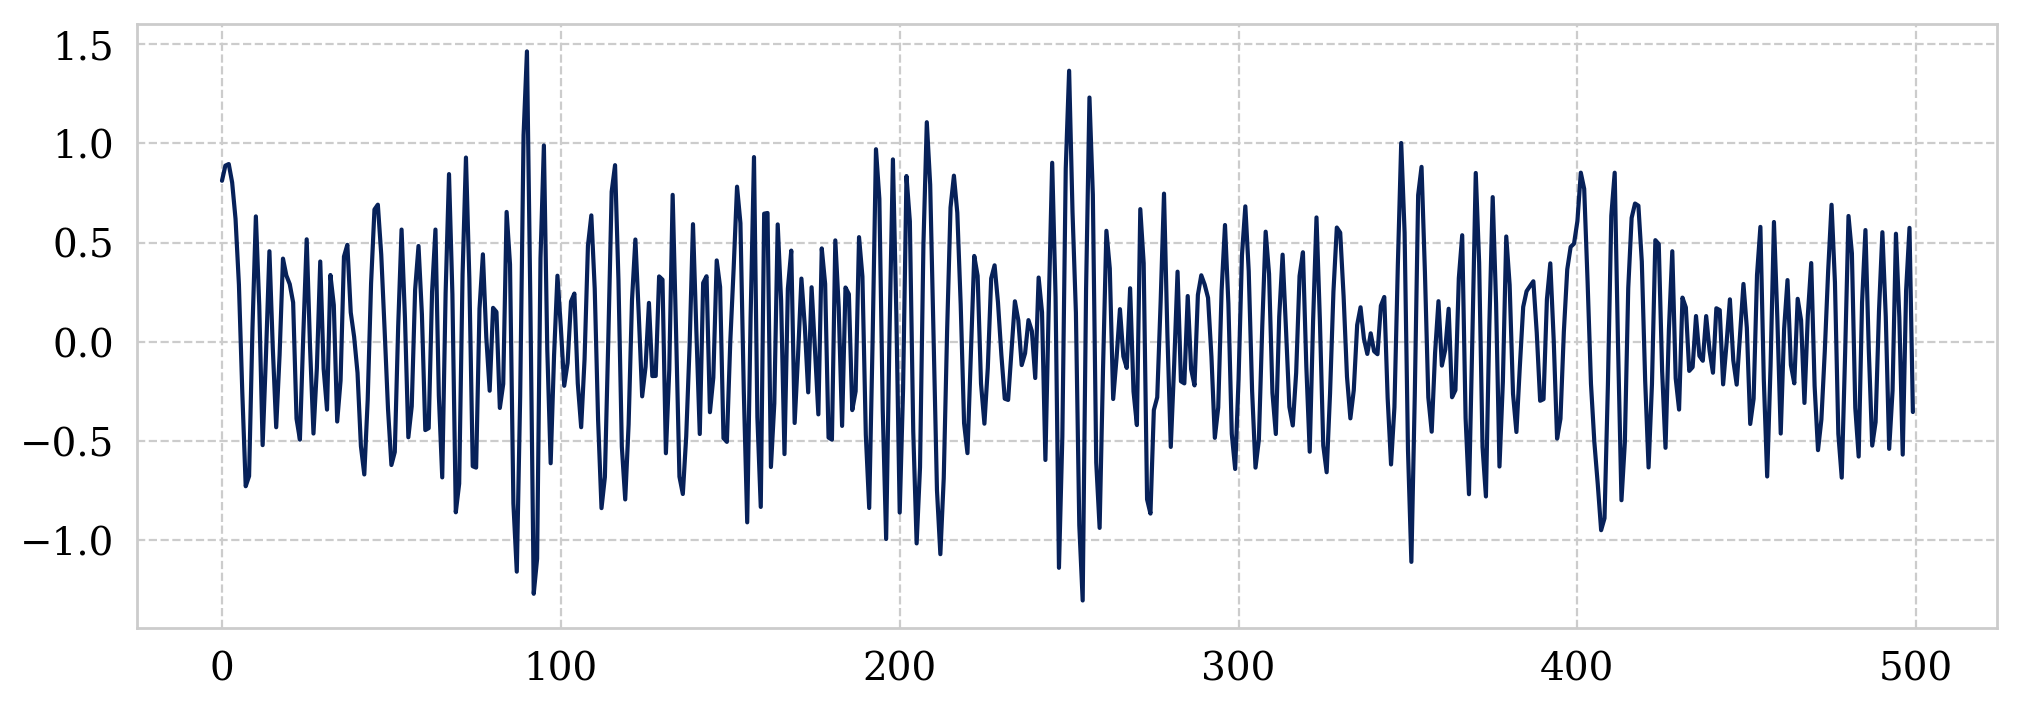

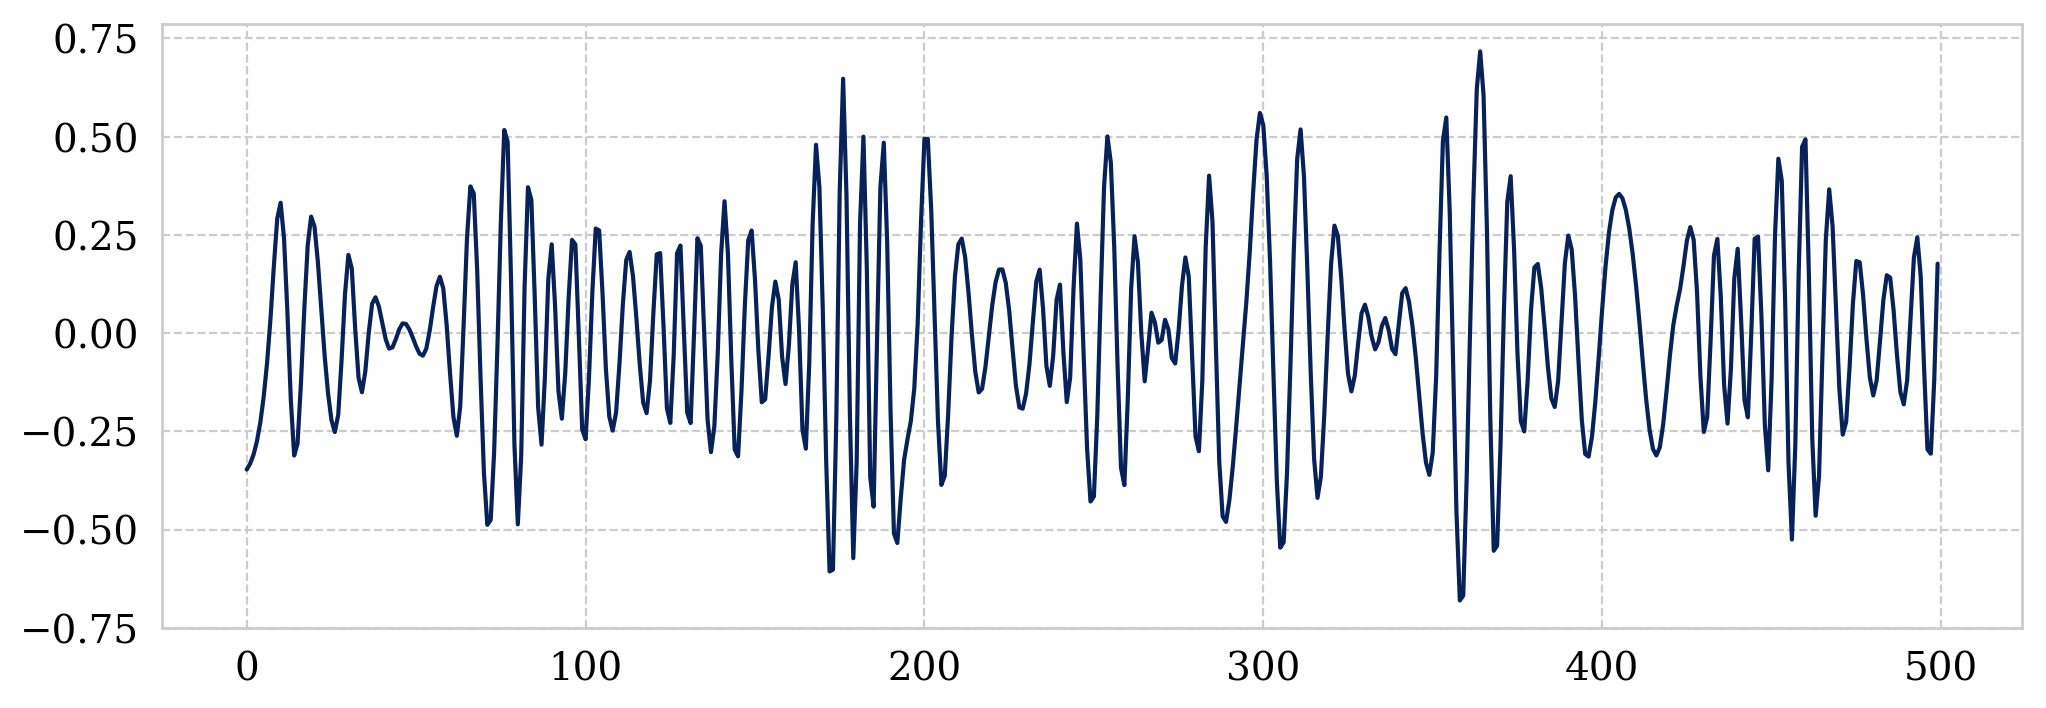

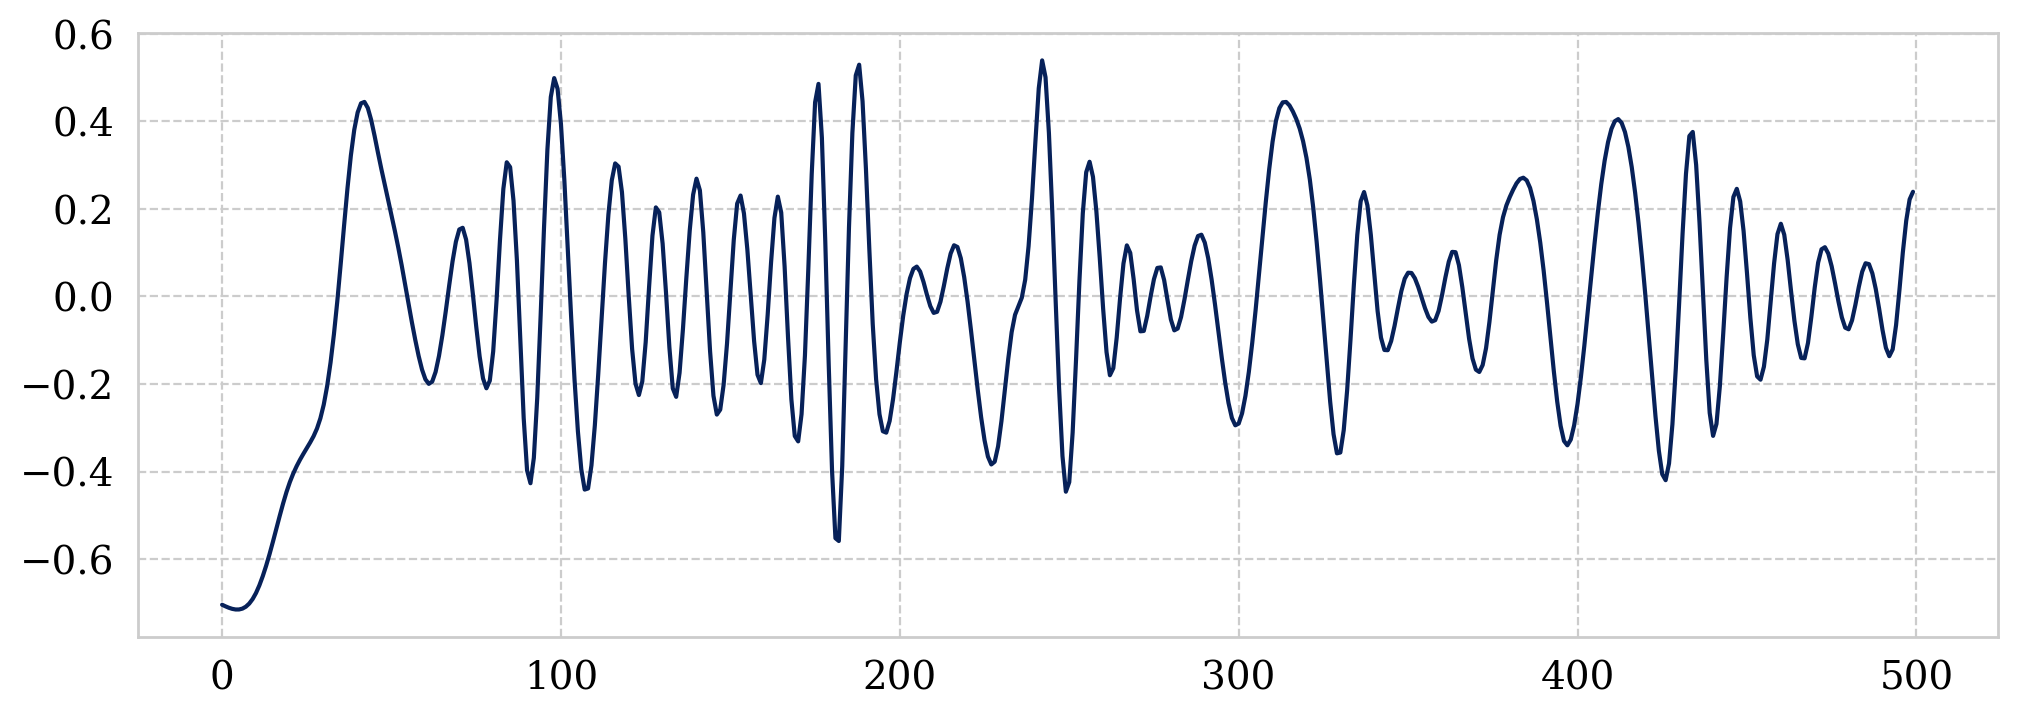

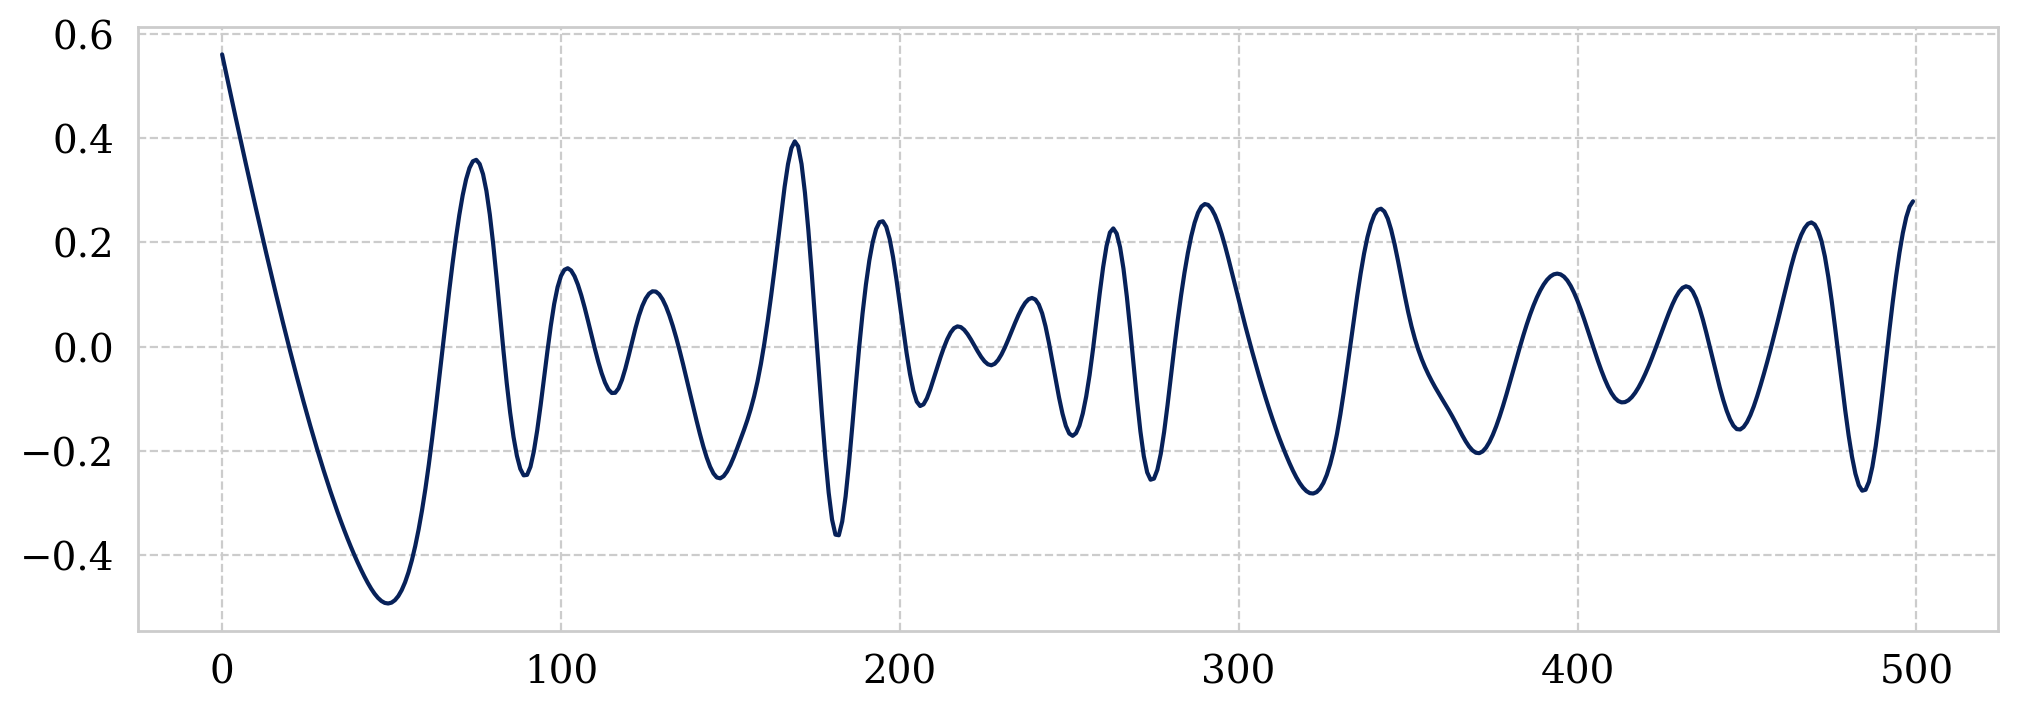

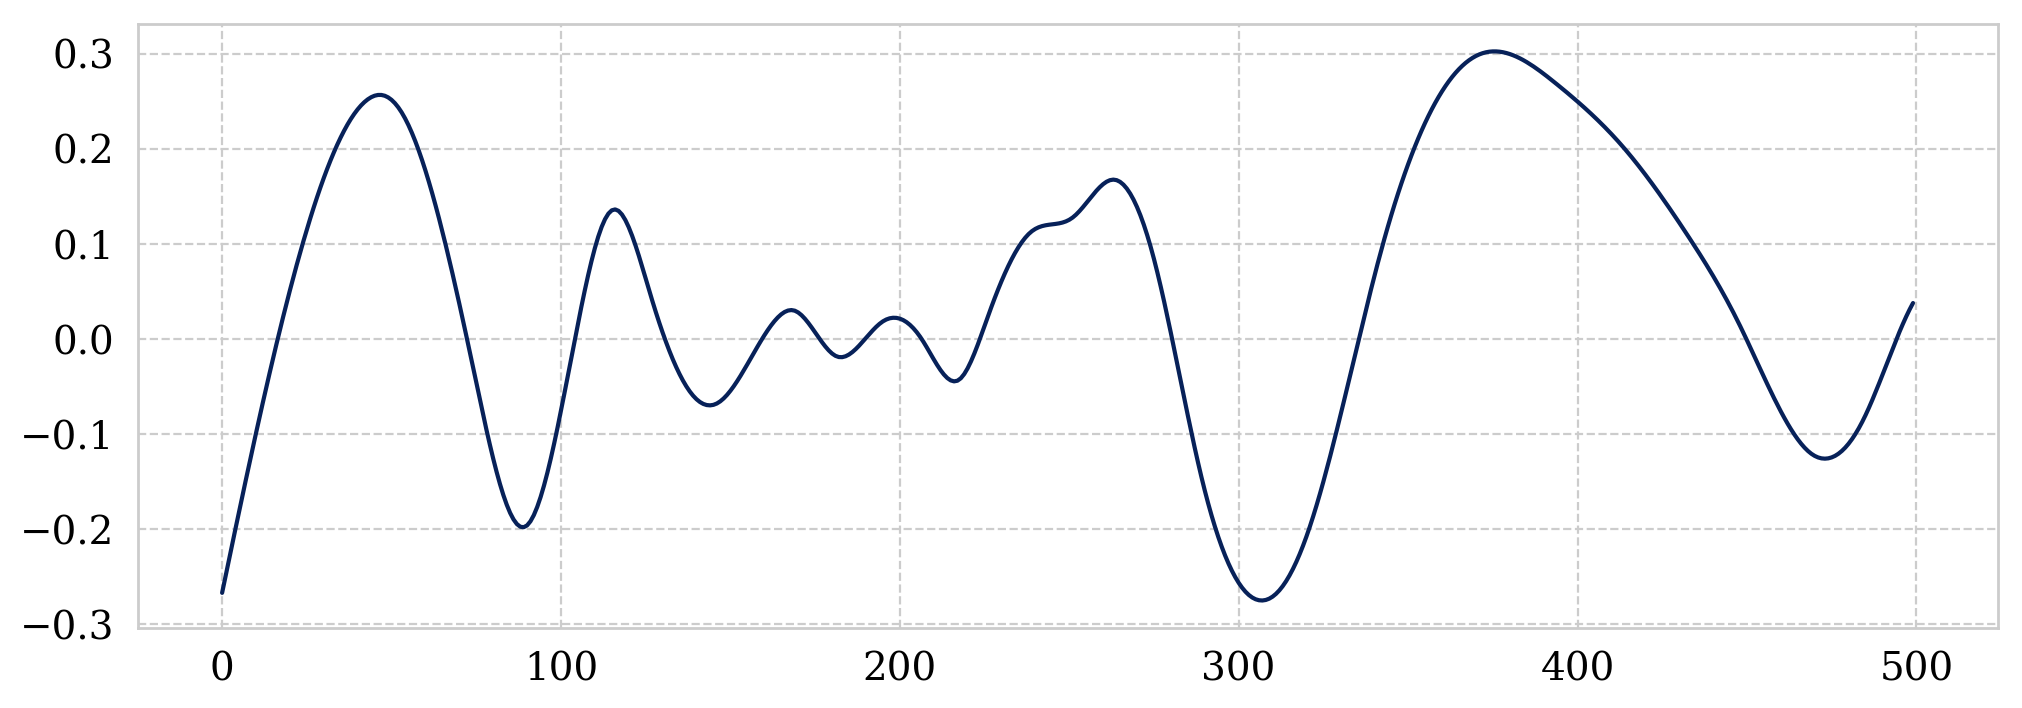

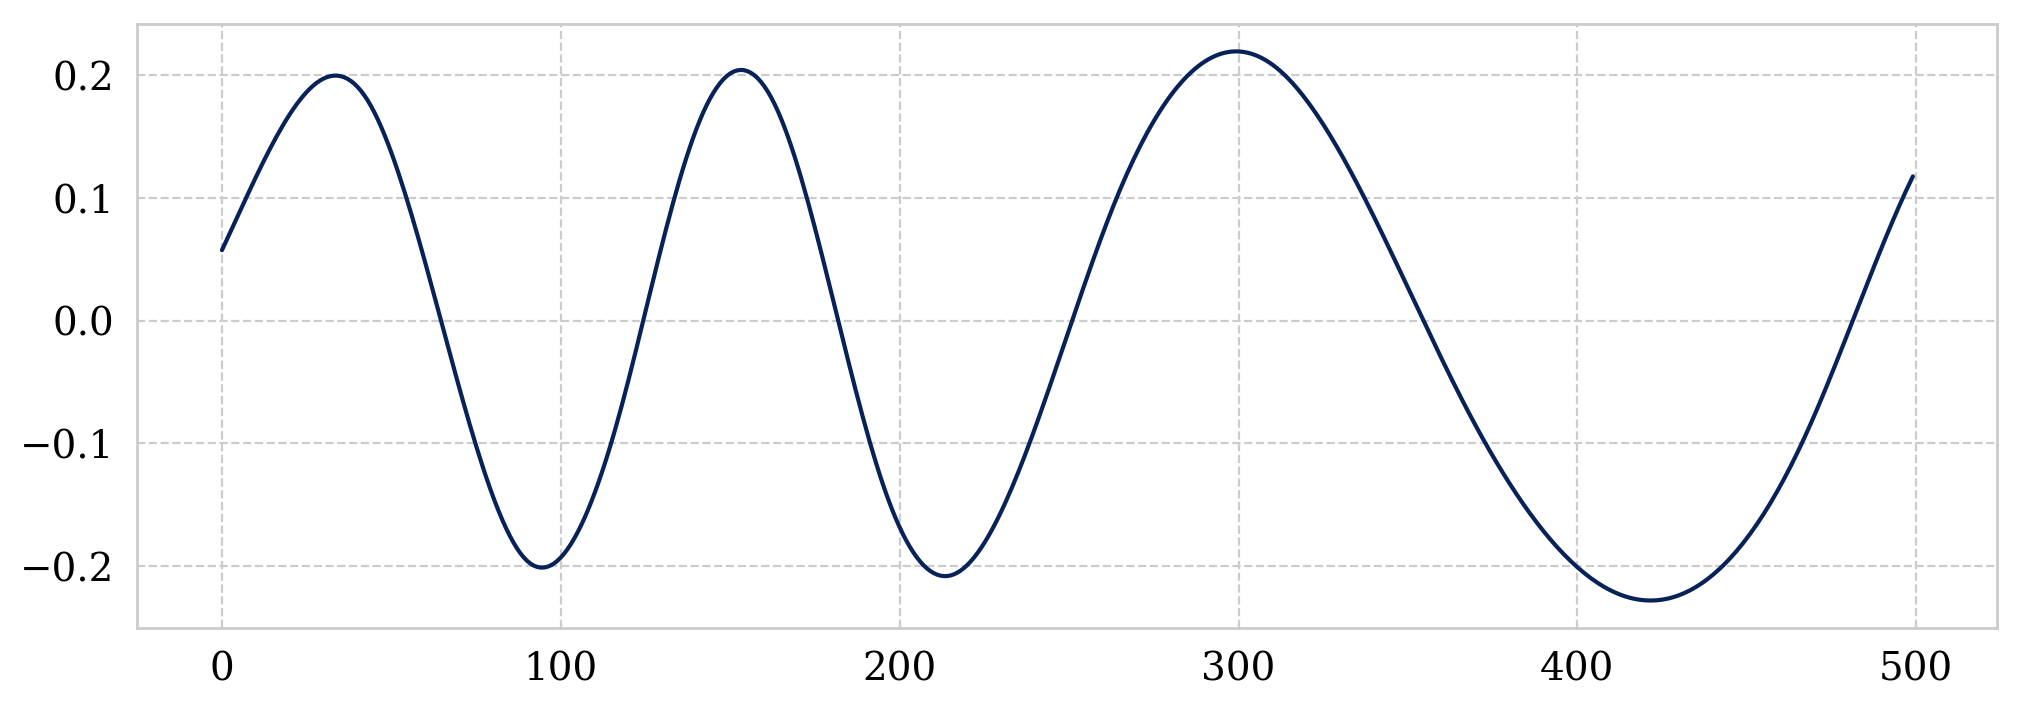

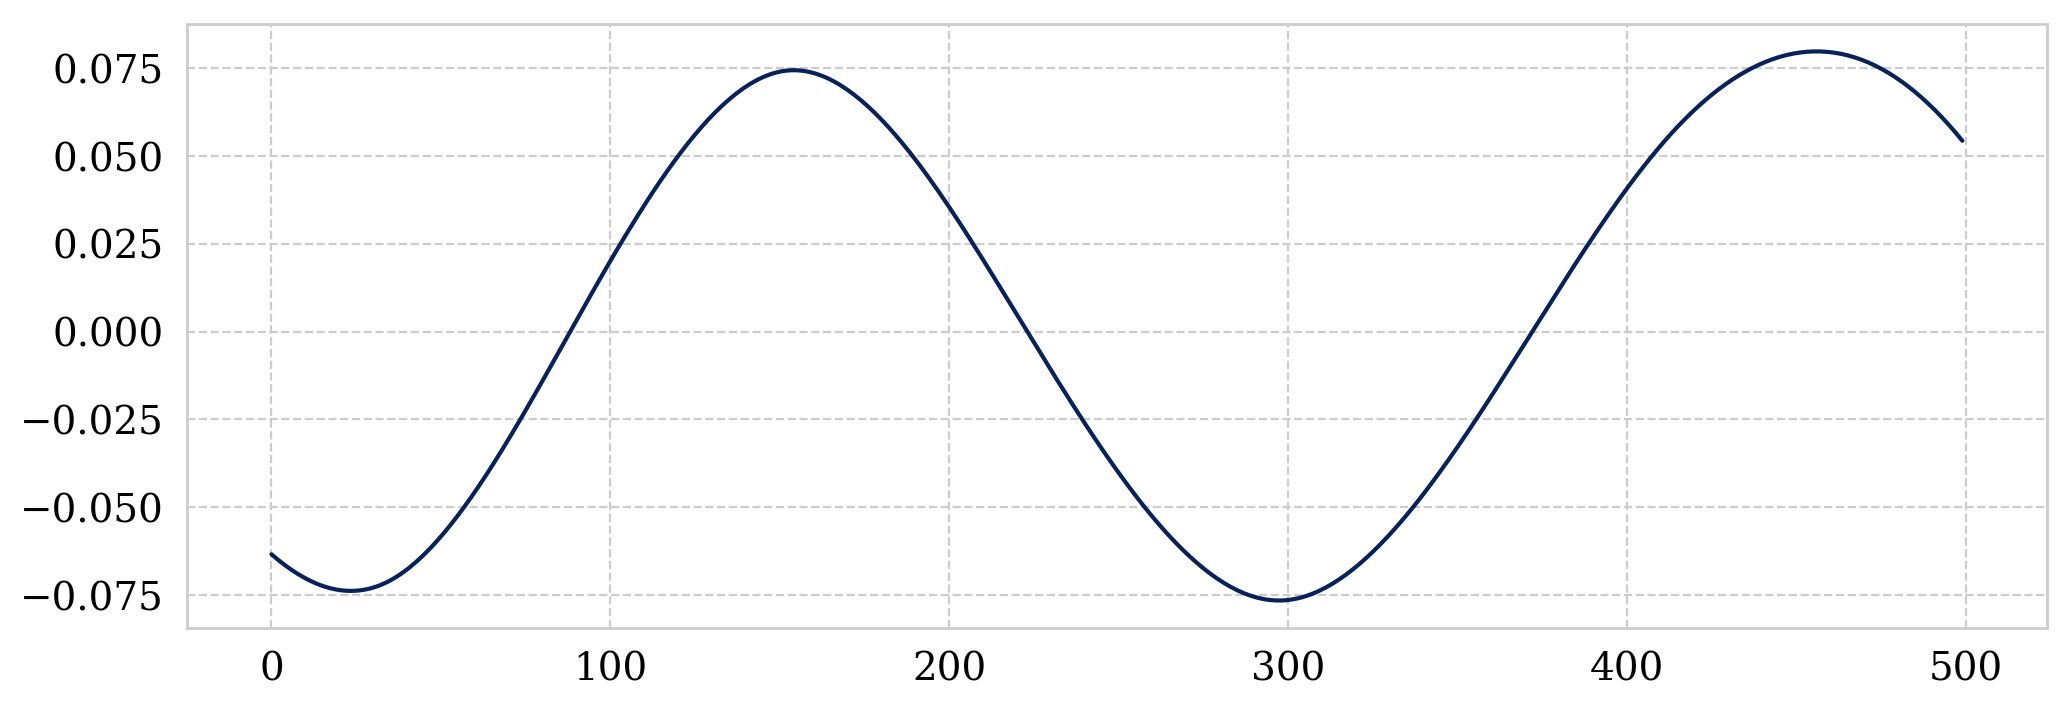

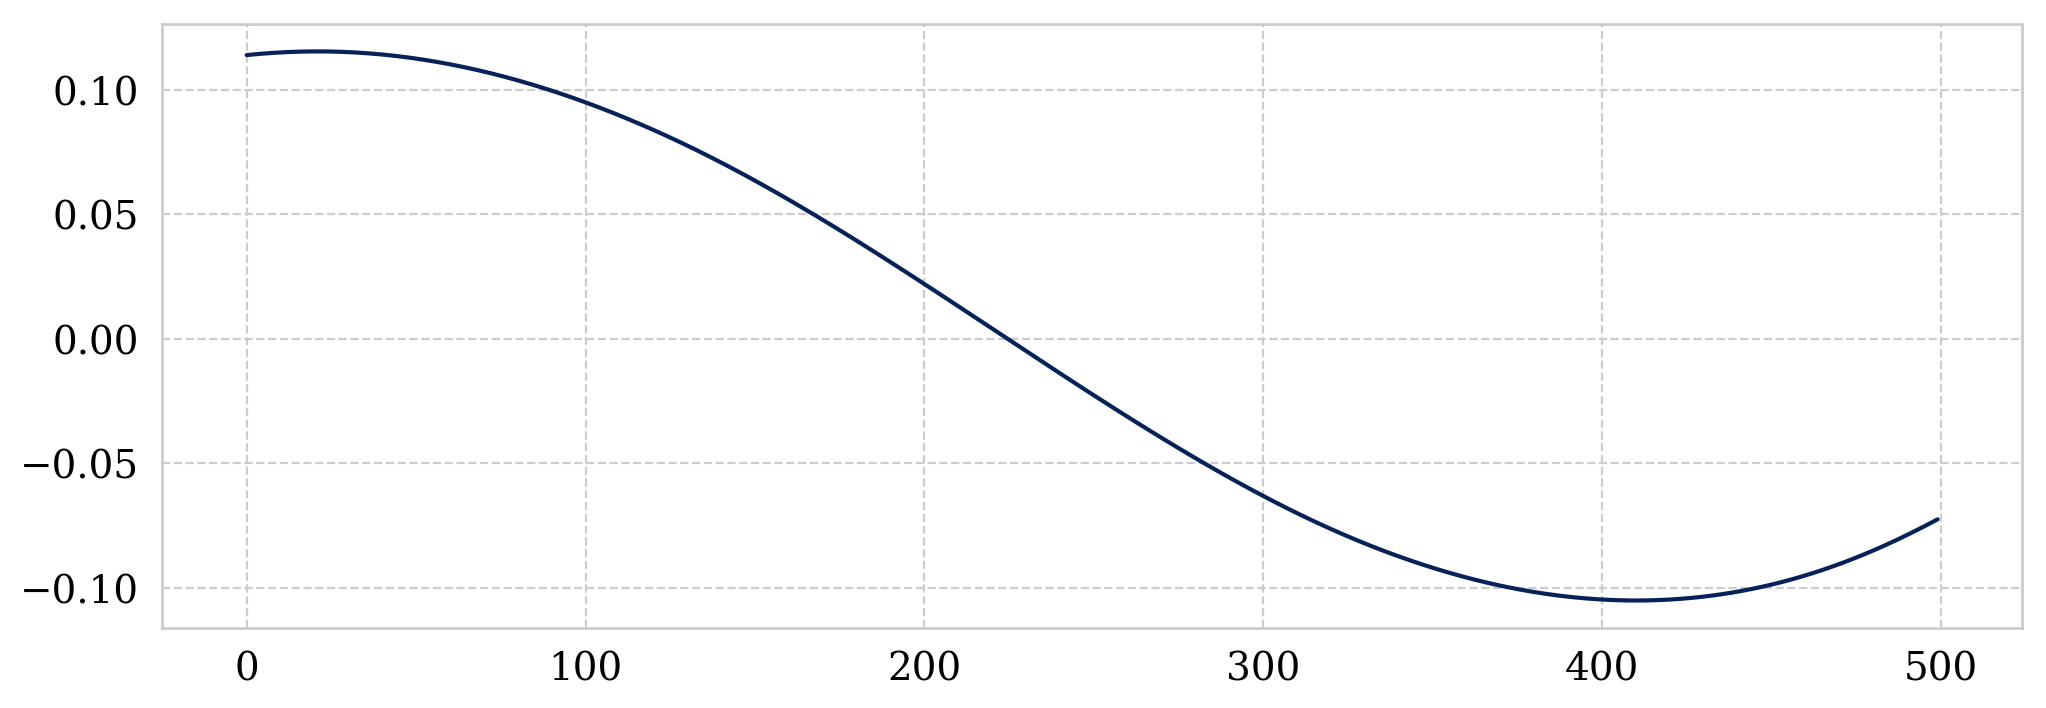

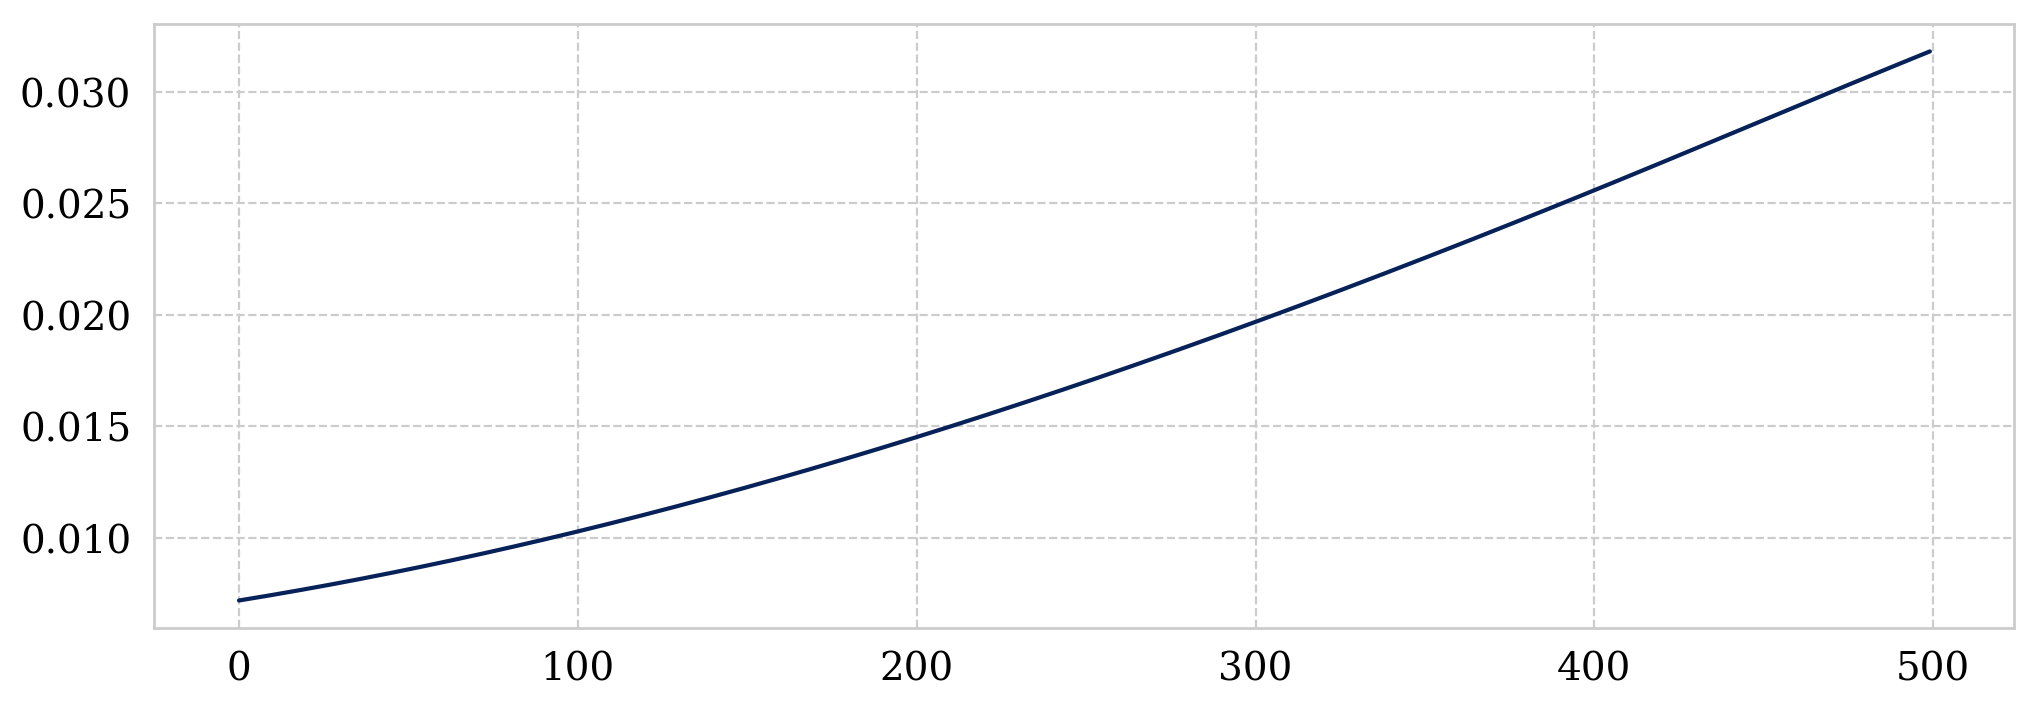

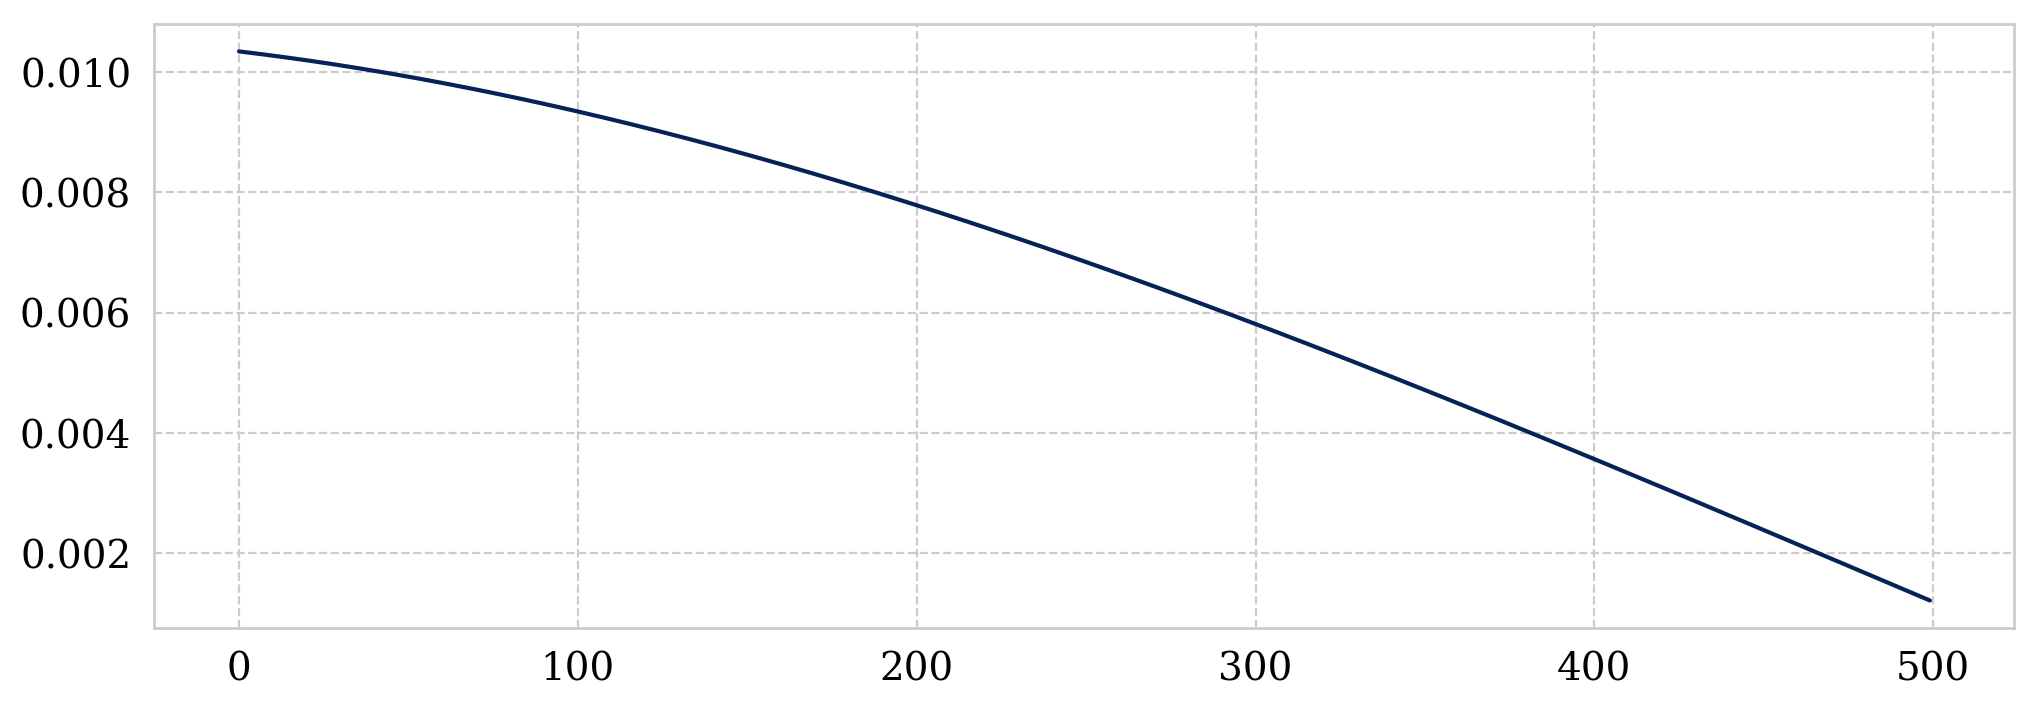

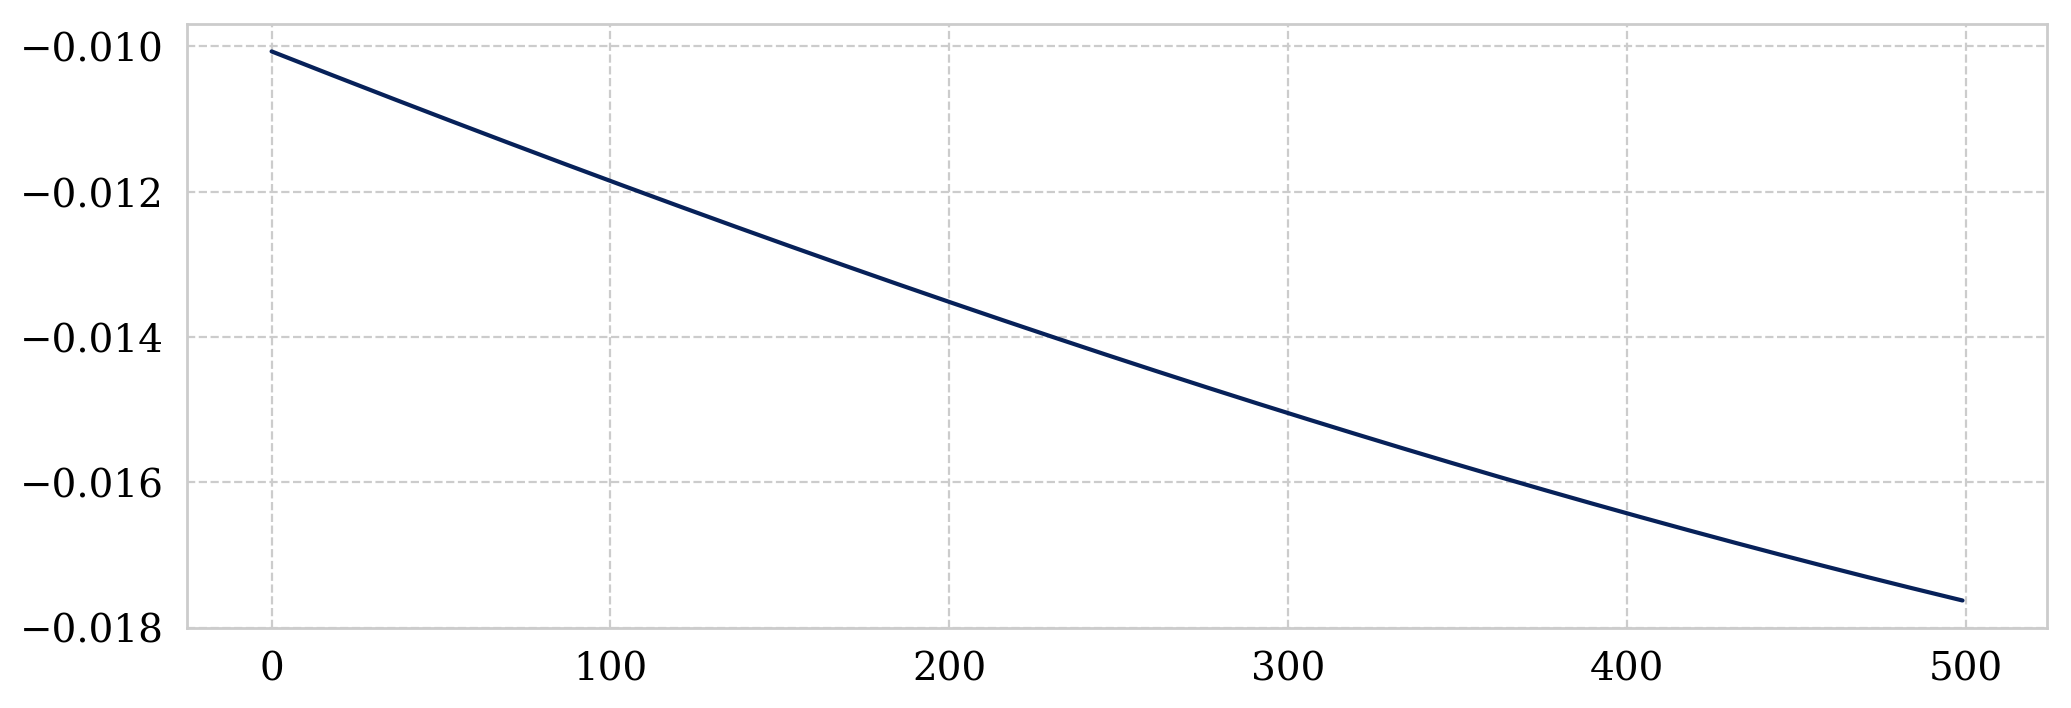

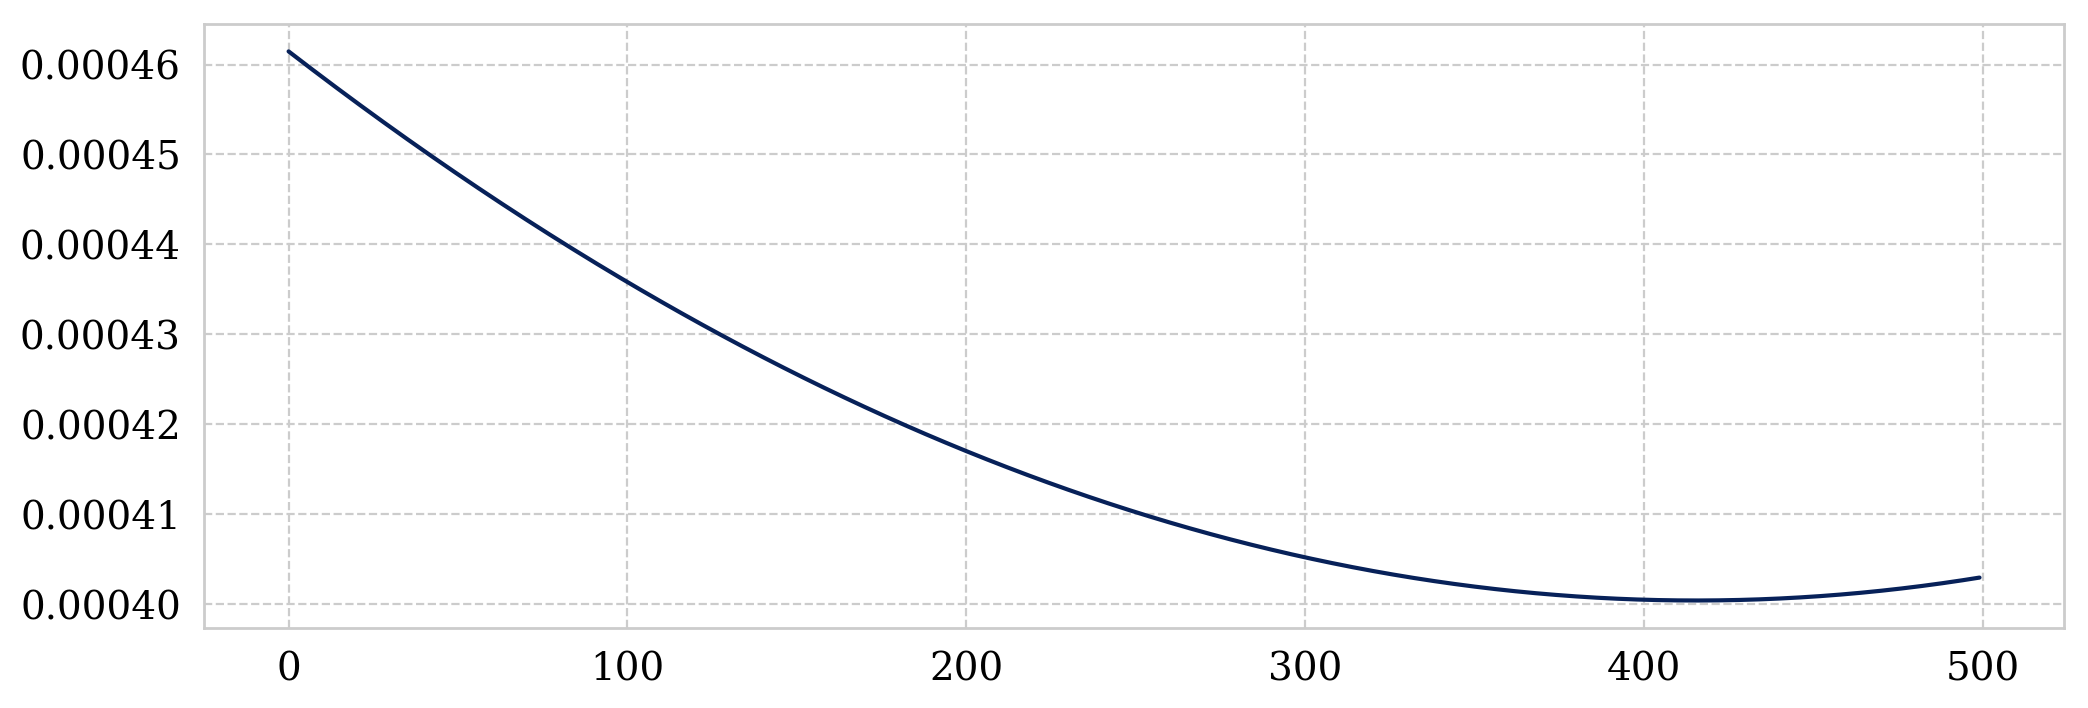

In [125]:
for signal in vals:
    plt.plot(signal[0:500])
    plt.show()
#plt.plot(vals[1])

In [122]:
vals = genfromtxt(filtered_path+'interval_number_'+str(65)+'.csv', delimiter=',')
corr_df = correlation_coeff.get_corr_coef(vals)
corr_df

Signal  Correlation coefficient
0   Raw signal                 1.000000
1         IMF1                -0.086239
2         IMF2                -0.048016
3         IMF3                -0.023285
4         IMF4                -0.014053
5         IMF5                -0.008708
6         IMF6                -0.007473
7         IMF7                -0.005074
8         IMF8                -0.003897
9         IMF9                -0.001893
10       IMF10                 0.002364
11       IMF11                -0.000545
12       IMF12                -0.001121

In [107]:
# Reading filtered from disk
from numpy import genfromtxt
filtered_path = f"../../../../../../signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/"

num_csvs = len([f for f in os.listdir(filtered_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_path, f)) and f[0]=='i'])

eemds = []
filtered_freqs = []
columns = []

for i in range(num_csvs):
    vals = genfromtxt(filtered_path+'interval_number_'+str(i)+'.csv', delimiter=',')
    print(vals)
    # df=pd.read_csv(filtered_path+'interval_number_'+str(i)+'.csv')
    eemds.append(vals)
    if i == 5:
        break

[[ 1.16383839e+00  7.34639302e+00 -6.89910389e+00 ...  1.51875061e+00
   2.35420902e-01 -1.63376164e+00]
 [-1.57765637e-01 -3.30671124e-01 -7.28337557e-01 ... -1.69965388e-01
   6.04835718e-01  1.13790394e+00]
 [-4.94058049e-01 -4.59488580e-01 -1.94972570e-01 ...  6.96405037e-02
   4.67323637e-02  2.93881329e-02]
 ...
 [-1.44308931e-02 -1.44313488e-02 -1.44317996e-02 ... -1.05741438e-02
  -1.05649579e-02 -1.05557457e-02]
 [ 3.60882954e-03  3.60904849e-03  3.60926829e-03 ...  8.34229988e-03
   8.34162499e-03  8.34094628e-03]
 [ 6.19859084e-03  6.19855333e-03  6.19851586e-03 ...  8.60835137e-03
   8.60844784e-03  8.60854428e-03]]
[[ 6.81427704e+00  1.65058680e+01  1.18202504e+01 ... -5.73148900e+00
   1.57840006e+01 -1.62345258e+01]
 [-1.50677781e+00 -6.00060857e+00 -2.82825197e+00 ...  1.01093442e+00
  -2.86628476e+00 -4.44844981e+00]
 [-4.59674565e+00 -5.05667963e+00 -4.18012612e+00 ...  1.28978114e+00
  -4.58409247e-01 -2.42627231e+00]
 ...
 [-8.69199702e-02 -8.69047573e-02 -8.6889437

In [102]:
e = np.array(eIMFs)
e.shape

(14, 20000)

In [104]:
corr_df = correlation_coeff.get_corr_coef(eIMFs)
corr_df

Signal  Correlation coefficient
0   Raw signal                 1.000000
1         IMF1                -0.101023
2         IMF2                -0.059897
3         IMF3                -0.027231
4         IMF4                -0.017074
5         IMF5                -0.013149
6         IMF6                -0.006886
7         IMF7                -0.007692
8         IMF8                -0.006736
9         IMF9                -0.005193
10       IMF10                -0.002123
11       IMF11                -0.001021
12       IMF12                -0.001029
13       IMF13                 0.000566

## 6. Envelope spectral analysis

In [133]:
fs = times.shape[1] / times[0][-1]

In [134]:
selected_IMF_index = 1


highut_lp = 2000
rectified = abs(eIMFs[selected_IMF_index])**2
bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, highut_lp, fs, order=5)

In [141]:
rectified.shape

(20000,)

### Plotting rectfied signal

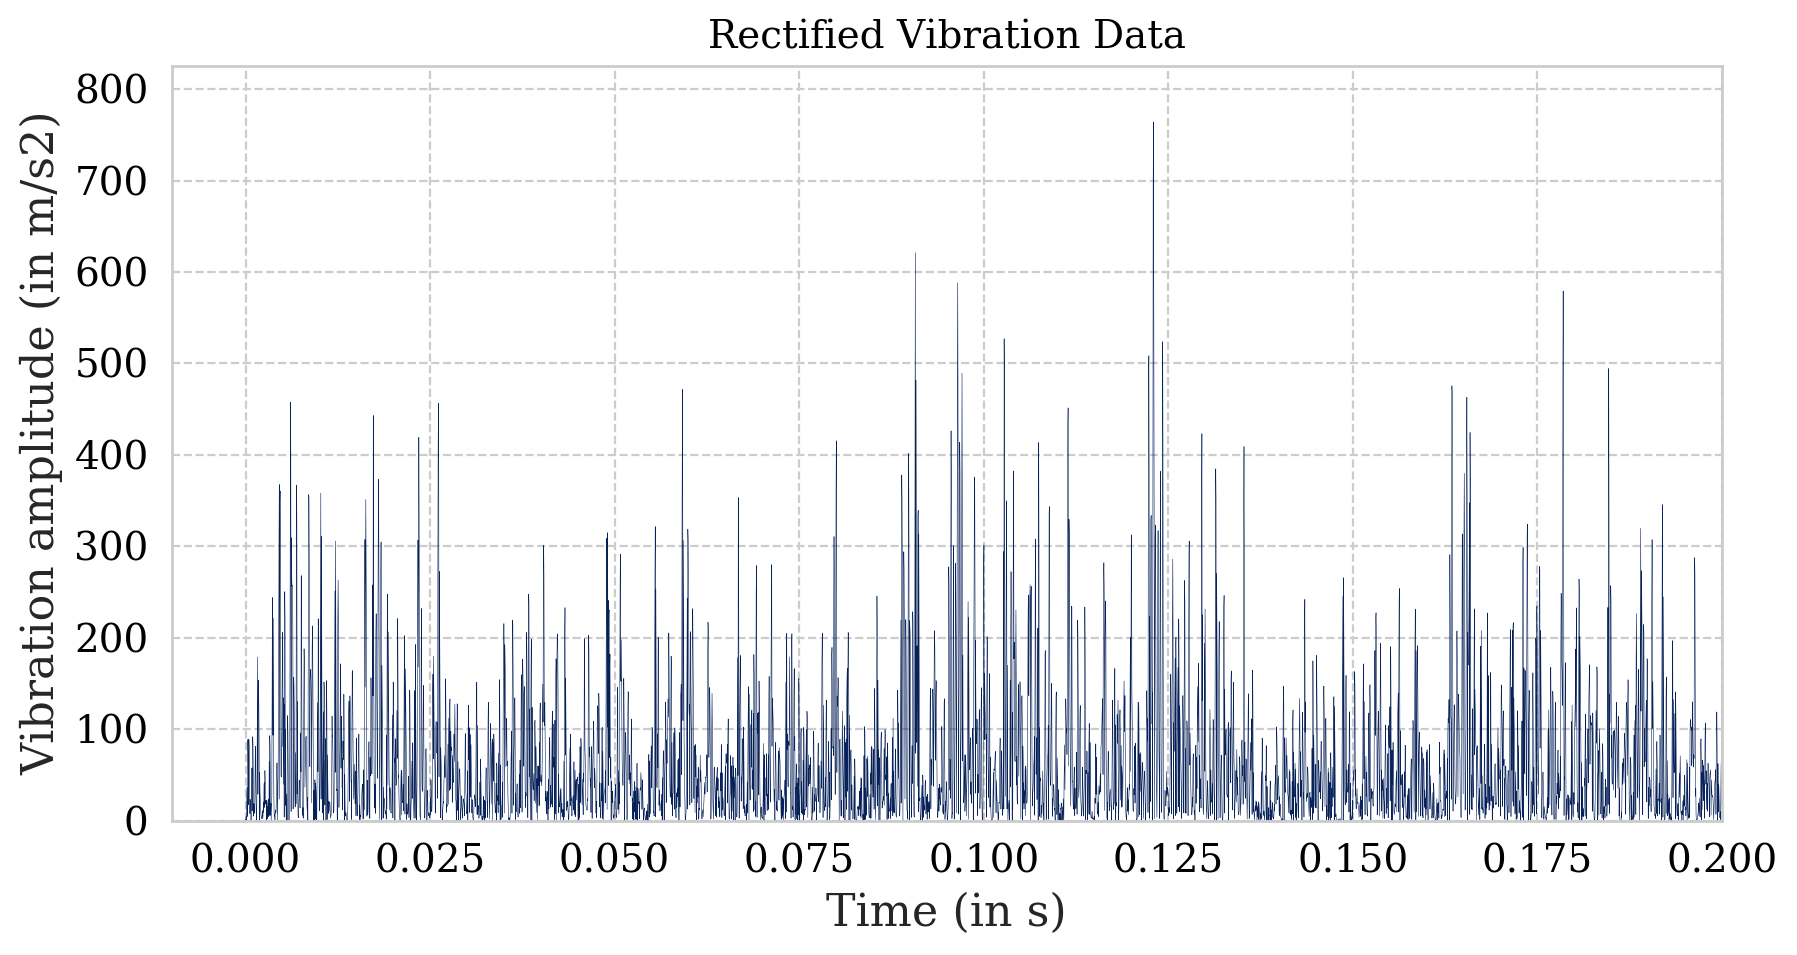

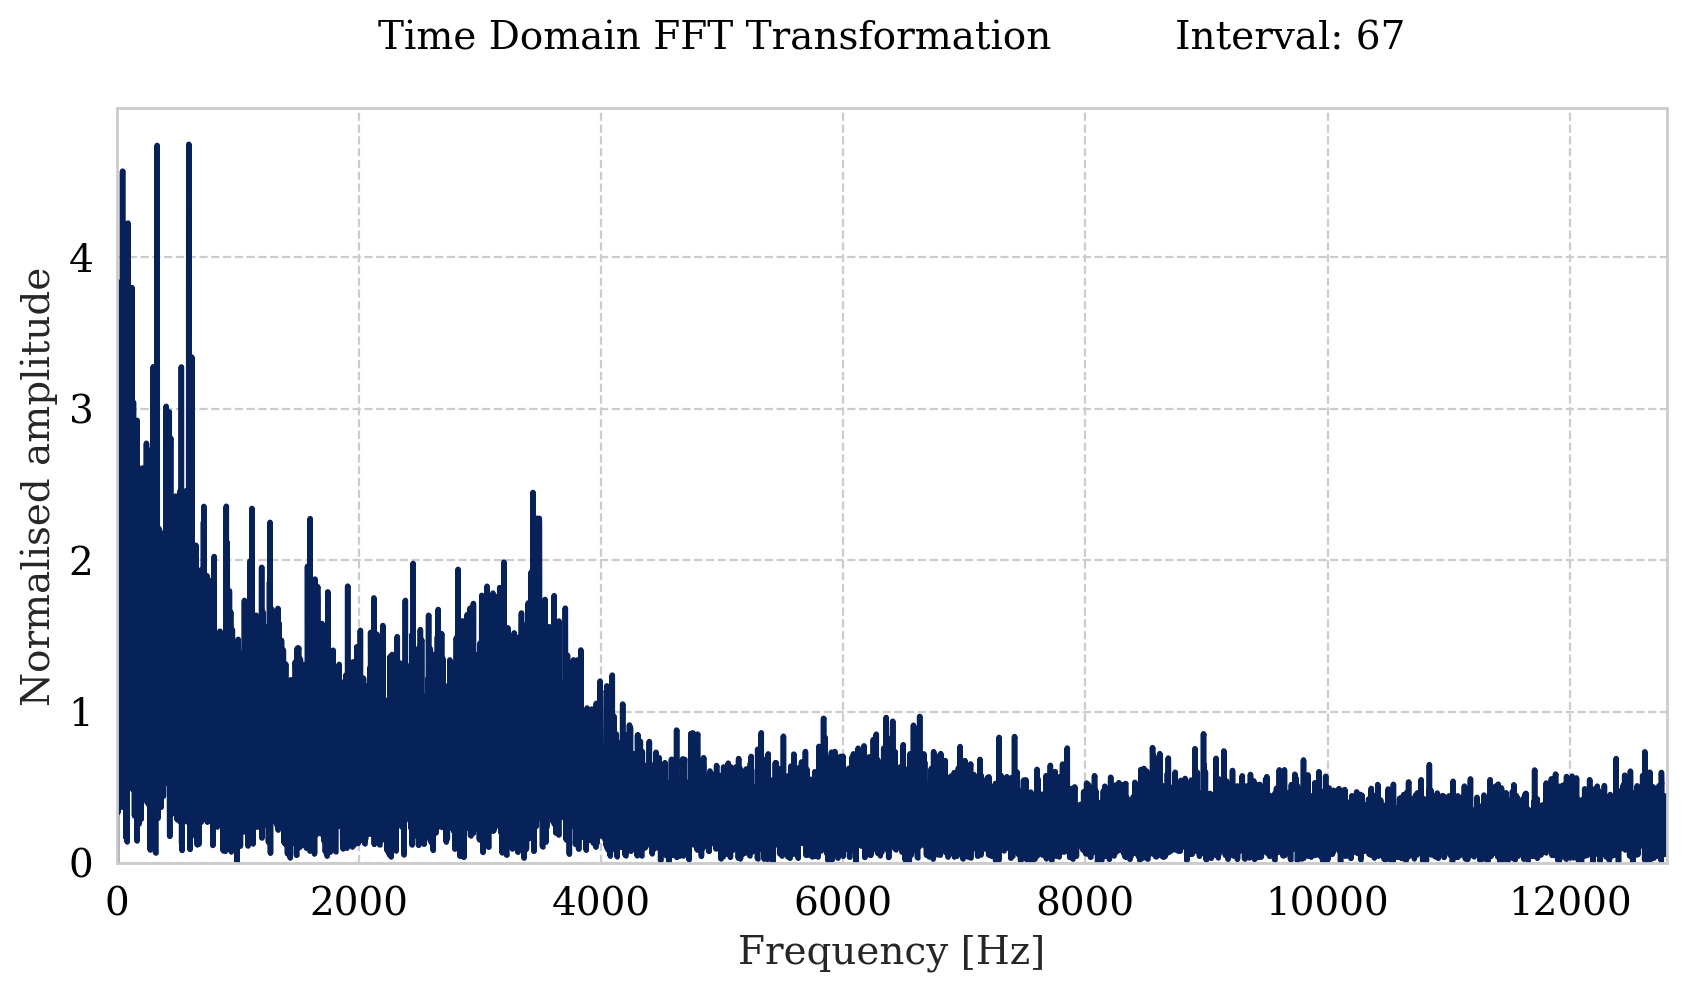

In [143]:
i=67
plotting_methods.plot_signal(times[i][0:20000], rectified, x_min=-0.01, x_max=0.2, name='Rectified')
plotting_methods.plot_fft(times[i][0:20000], rectified, interval_num=i)
                                   

### Plotting low pass filterd, rectified signal

In [149]:
%autoreload
plotting_methods

<module 'plotting_methods' from '/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src/hybrid_analysis_process_functions/plotting_methods.py'>

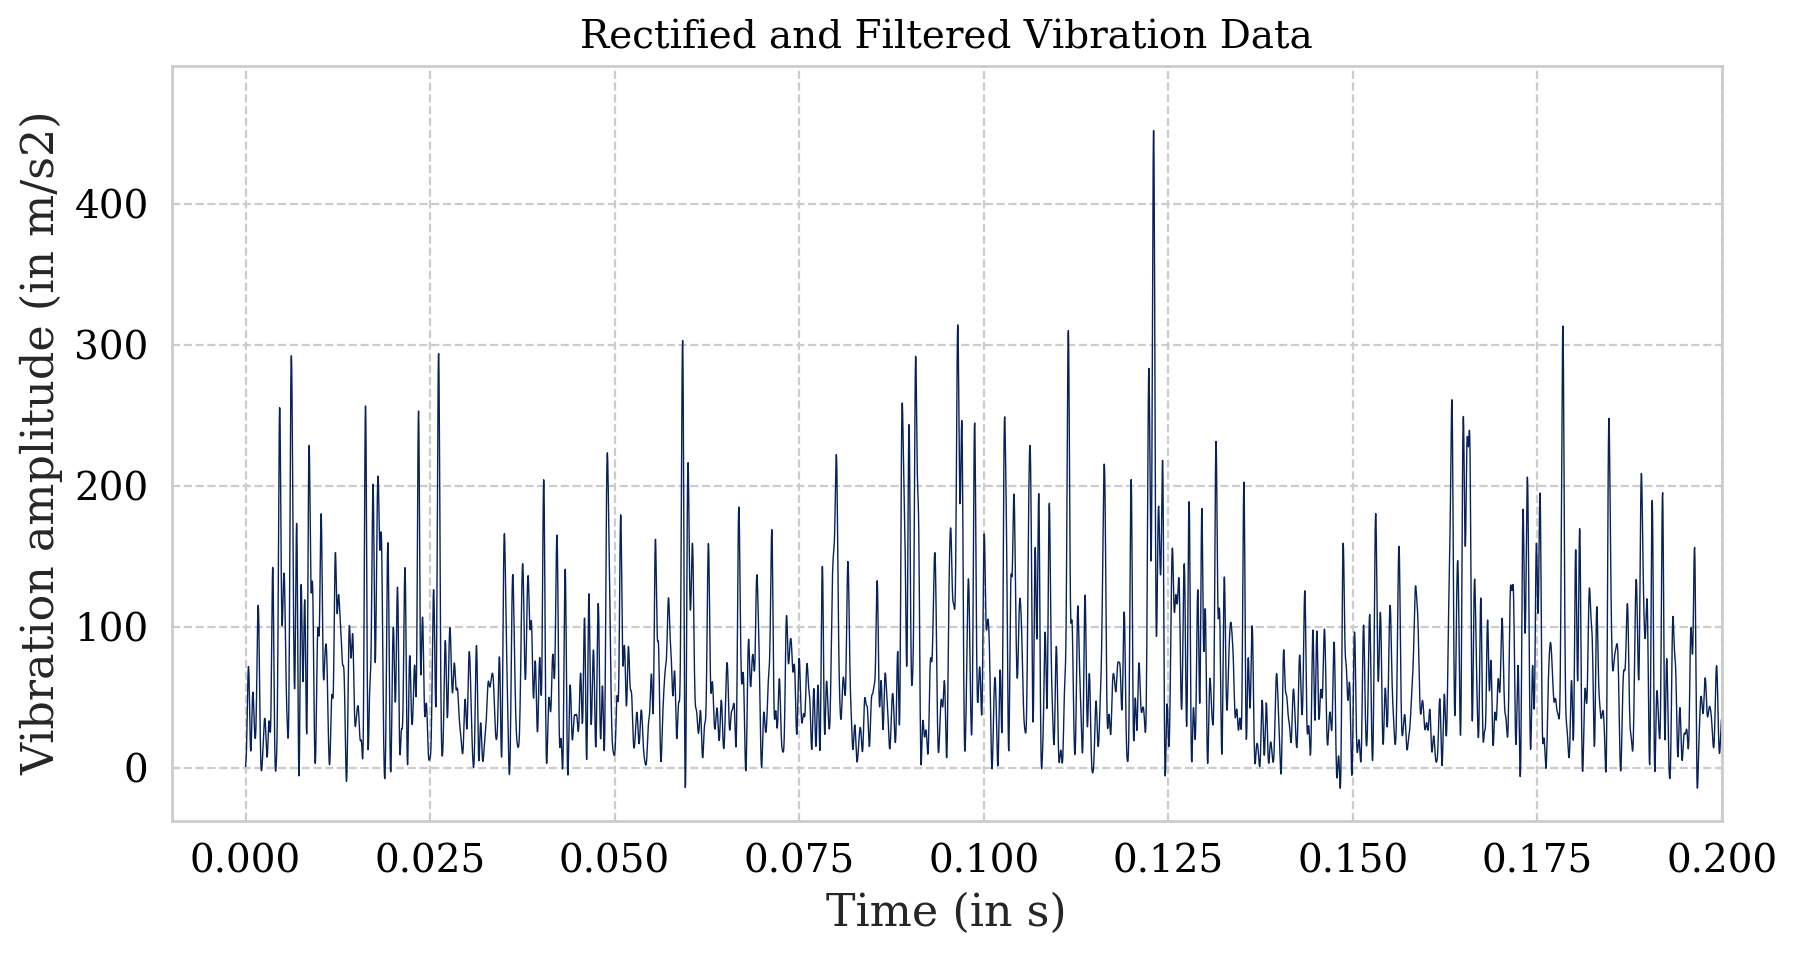

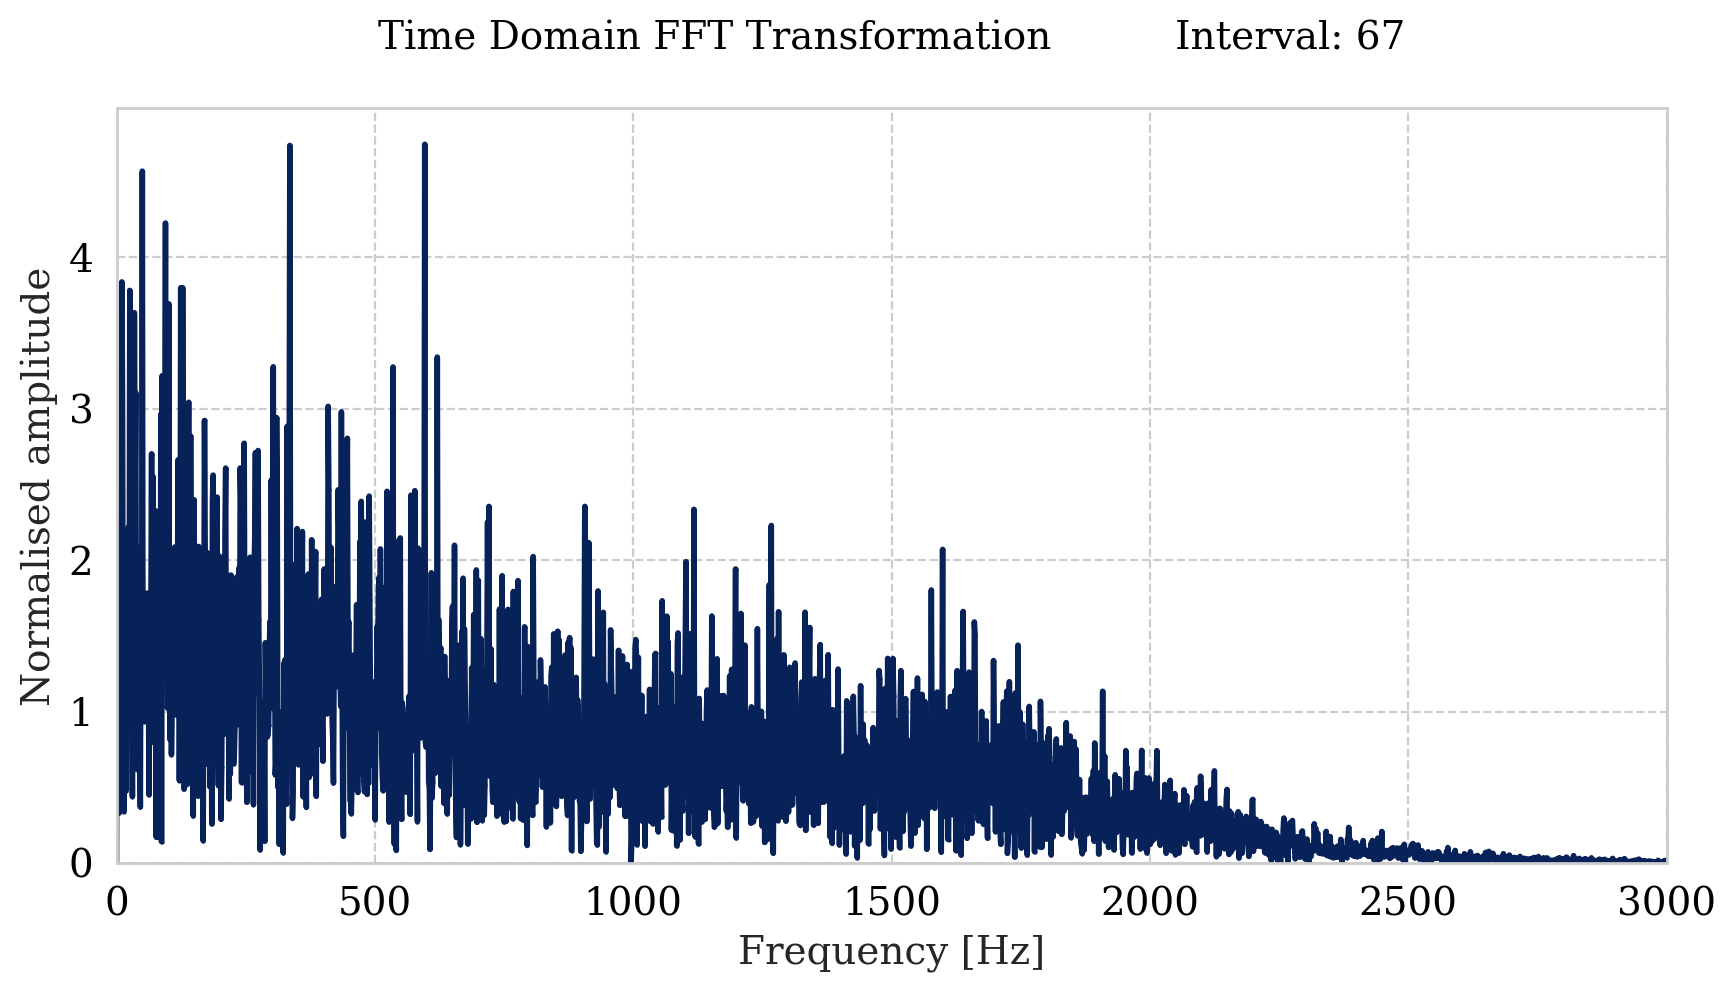

In [150]:
i=67
plotting_methods.plot_signal(times[i][0:20000], bandpass_filtered_rect_lp, x_min=-0.01, x_max=0.2, name='Rectified and Filtered')
plotting_methods.plot_fft(times[i][0:20000], bandpass_filtered_rect_lp, interval_num=i, x_max=3000)
                                   

## 7. Frequency study (fault characteristics), fault development

Text(0, 0.5, 'Normalised amplitude')

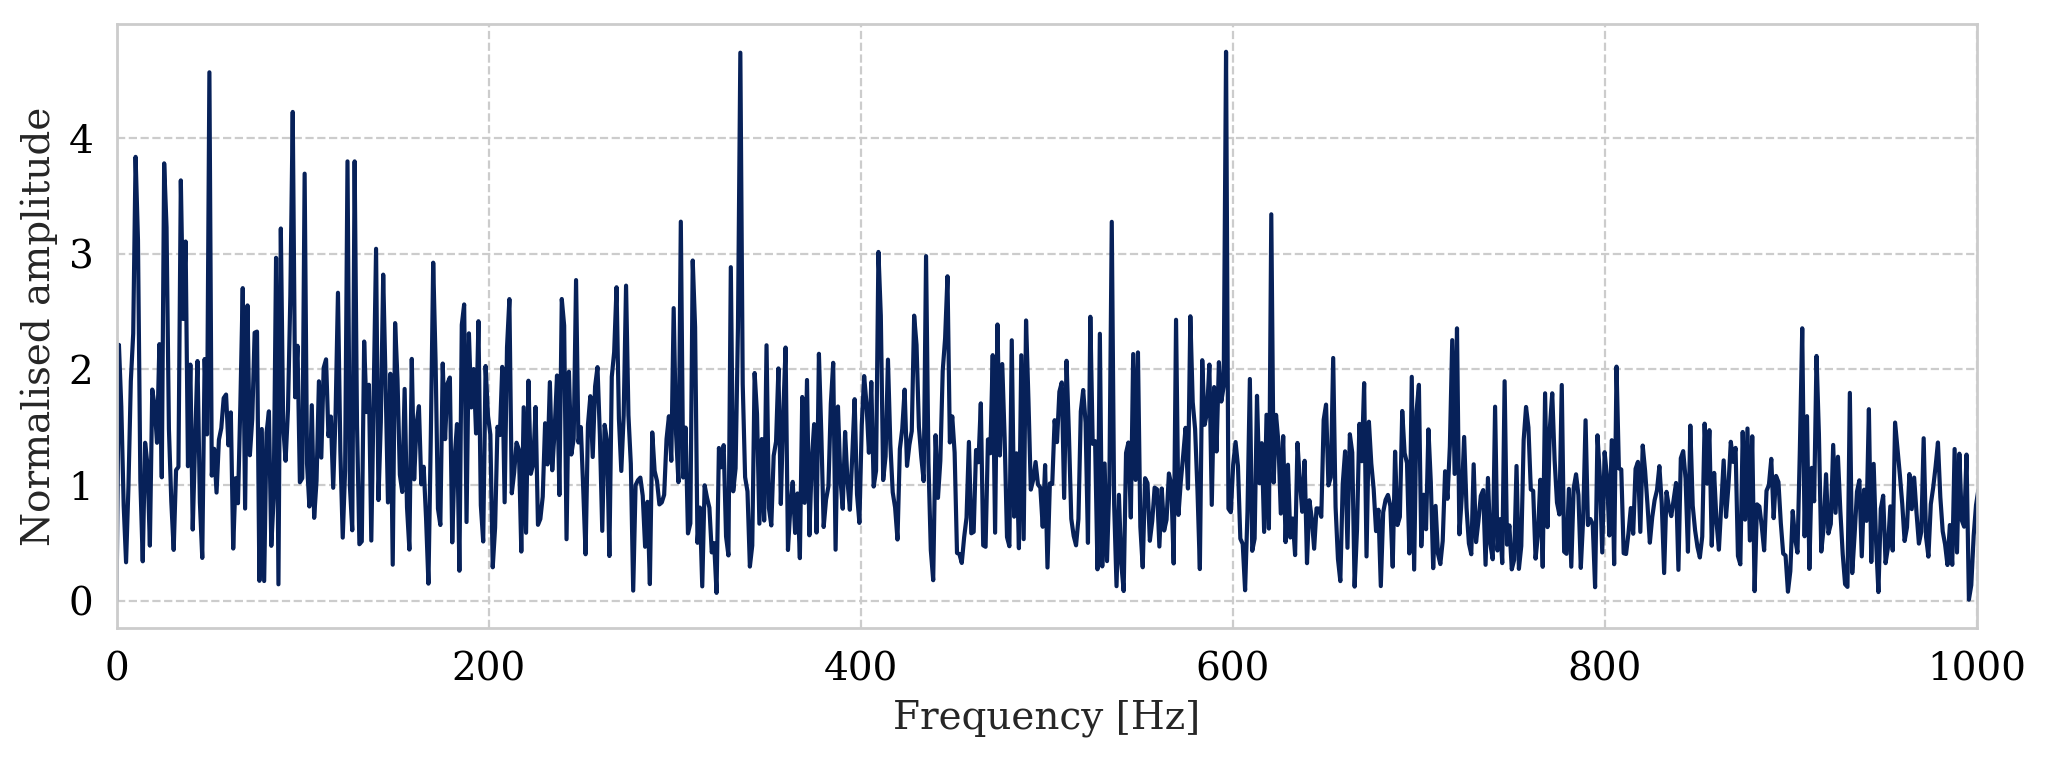

In [135]:

final_signal = envelope.perform_fft(bandpass_filtered_rect_lp,time,plot=True)

plt.plot(final_signal['freq'],final_signal['fft_norm'])
plt.xlim(0,1000)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Normalised amplitude")

### Feature extraction from time domain

1. RMS
2. Kurtosis 
3. Skewness 
4. Peak to peak
5. Crest factor 
6. Shape factor 
7. Impulse factor 
8. Margin factor 
9. Mean 
10. STD 
11. Enery 
12. Energy entropy

In [ ]:
# Feature extraction from time domain
rms, kurt, skewness, energy_mean, signal_mean = feature_extraction.get_time_domain_features(bandpass_filtered_rect_lp,fs)